<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
import pandas as pd  # Library for data manipulation and analysis.
import numpy as np   # Fundamental package for scientific computing.
import matplotlib.pyplot as plt  # Plotting library for creating visualizations.
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns #For advanced visualizations.

from sklearn.model_selection import train_test_split  # Function for splitting datasets for training and testing.
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import time  # Module for time-related operations.

import tensorflow as tf #An end-to-end open source machine learning platform
from tensorflow import keras  # High-level neural networks API for deep learning.
from keras import optimizers
from keras import backend   # Abstraction layer for neural network backend engines.
from keras.models import Sequential  # Model for building NN sequentially.
from keras.layers import Dense,Dropout,BatchNormalization   # for creating fully connected neural network layers.


In [ ]:
def set_global_random_seed():
  # Set the seed using keras.utils.set_random_seed. This will set:
  # 1) `numpy` seed
  # 2) backend random seed
  # 3) `python` random seed
  keras.utils.set_random_seed(812)

  # If using TensorFlow, this will make GPU ops as deterministic as possible,
  # but it might affect the overall performance
  tf.config.experimental.enable_op_determinism()

In [ ]:
set_global_random_seed()

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
churnData = pd.read_csv('/content/drive/MyDrive/great_learning/ann/credit-cards-project/Churn.csv')
df = churnData.copy()

## Data Overview

### Checking the data types of the columns for the dataset

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- There are 10000 rows of data with 14 columns including target variable

- There are 3 columns **Surname**, **Geography** and **Gender** that are of type object and the rest of columns are having numeric value types

### Checking duplicate values

In [ ]:
duplicate = df.duplicated().sum()
print(f"There is {duplicate} duplicate values");

There is 0 duplicate values


### Checking for Missing Values

In [ ]:
round(df.isnull().sum() / df.isnull().count() * 100, 2)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

- **There is no Missing values**

### Let's look at the distribution of numerical values

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


- RowNumber and CustomerId are uniq values and we will ignore them
- **CreditScore** is between min 350 and max 850 with the average of 650 almost nomal distribution
- **Age** is between 18-92 with average of 38, almost normalized distribution
- **Tenure** range is between 0 to 10 years
- **Balance** is between 0 to 250k with average of 76k and median of 97k forms a right skwed distribution
- **EstimatedSalary** is between 11.5 to 200k with the mean and median around 100k has a normal distribution

In [ ]:
# list of all categorical variables
cat_col =[i for i in df.columns if df.dtypes[i]=='object']
# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts(normalize=True))
    print("-" * 50)

Surname
Smith       0.0032
Scott       0.0029
Martin      0.0029
Walker      0.0028
Brown       0.0026
             ...  
Izmailov    0.0001
Bold        0.0001
Bonham      0.0001
Poninski    0.0001
Burbidge    0.0001
Name: proportion, Length: 2932, dtype: float64
--------------------------------------------------
Geography
France     0.5014
Germany    0.2509
Spain      0.2477
Name: proportion, dtype: float64
--------------------------------------------------
Gender
Male      0.5457
Female    0.4543
Name: proportion, dtype: float64
--------------------------------------------------


### Let's check the columns which have unique values

In [ ]:
df['Surname'].value_counts()
print(f"There are {df['CustomerId'].nunique()} unique CustomerId and {df['RowNumber'].nunique()} unique RowNumber")

There are 10000 unique CustomerId and 10000 unique RowNumber


- CustomerId
- RowNumber
- Surname

 Columns are not adding any value to the analysis so, We will remove these colunms from dataframe.

In [ ]:
df.drop(["CustomerId","RowNumber","Surname"], axis=1,  inplace=True)

In [ ]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Let's check the percentage of each class in the dataset and possible class imbalance

In [ ]:
(df.Exited.value_counts())/(df.Exited.count())

Exited
0    0.7963
1    0.2037
Name: count, dtype: float64

- This shows that 20.37% of data are related to Exited customers and
- 79.63% are related to Not-Exited Customers
- This show the class imbalance in the data as well

- Get a copy of the data for EDA and replace target variable **Exited** with Yes/No

In [ ]:
data = df.copy()

In [ ]:
data["Exited"].replace(1, "yes", inplace=True)
data["Exited"].replace(0, "no", inplace=True)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,yes
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,no
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,yes
3,699,France,Female,39,1,0.00,2,0,0,93826.63,no
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,no
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,no
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,no
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,yes
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,yes


## Exploratory Data Analysis

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

def format_percent(number):
    return("{:0.2f}%".format(number))


In [ ]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,yes
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,no
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,yes
3,699,France,Female,39,1,0.00,2,0,0,93826.63,no
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,no
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,no
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,no
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,yes
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,yes


### Univariate Analysis

#### Observation on CreditScore

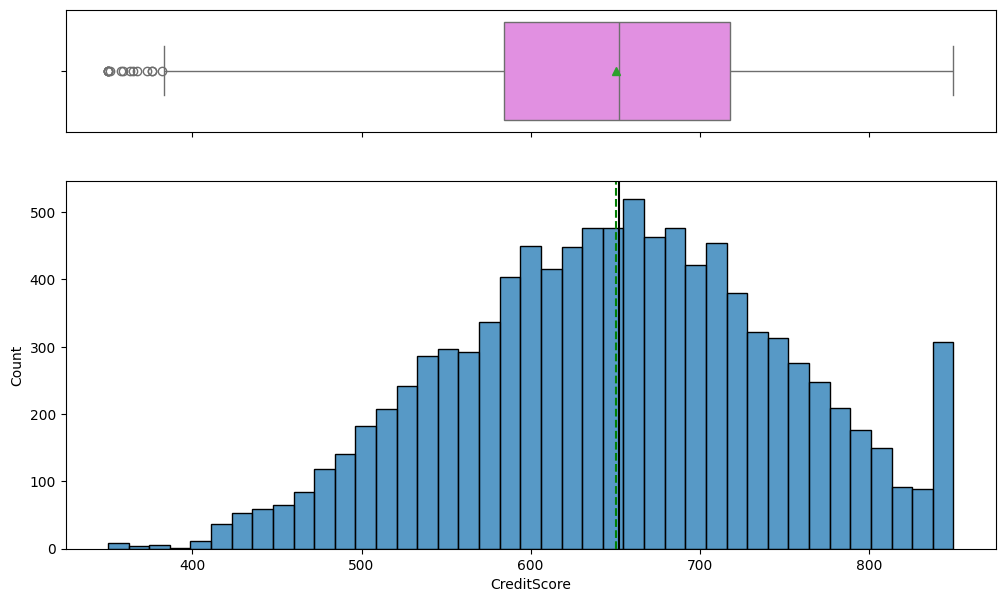

In [ ]:
histogram_boxplot(data,'CreditScore')

- **CreditScore** has a normalized distribution with minimum 350 and maximum 850 with mean 650
- 50% of the customers have the credit score between around 570 to 730

#### Observation on Age

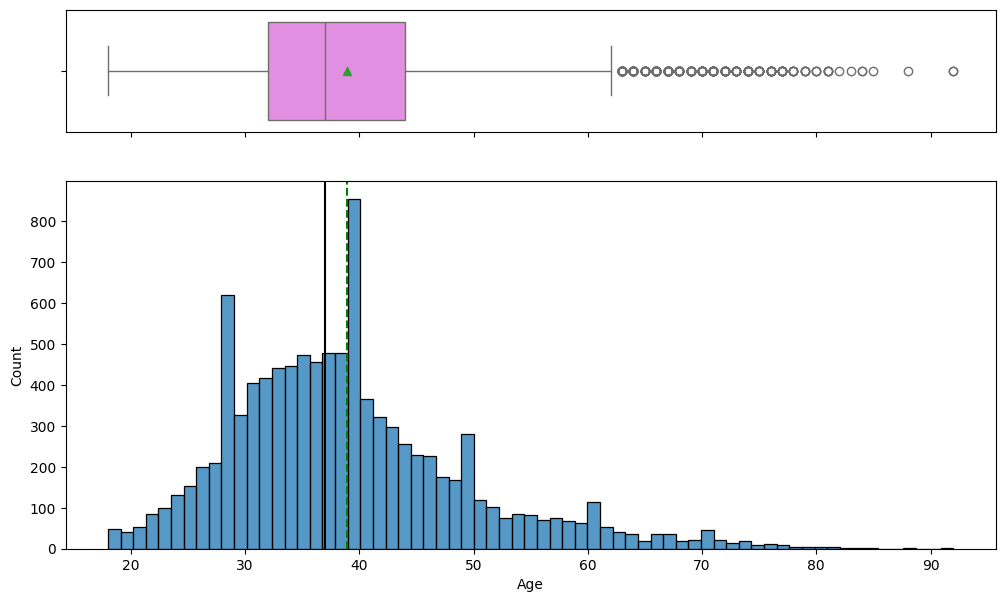

In [ ]:
histogram_boxplot(data,'Age')

- **Age** has a slightly right skewed distribution with minumum 18 and maximum of 92 and average of 38 and some outliers that is part of the real data.

#### Observation on Tenure

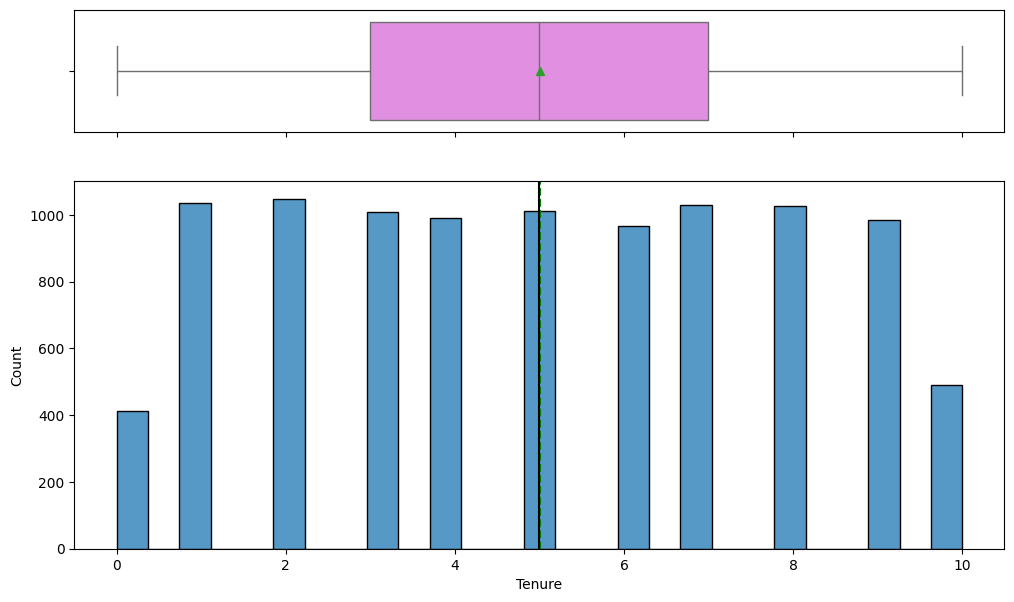

In [ ]:
histogram_boxplot(data,'Tenure')

- **Tenure** has a nomal distribution with minumum 0 and maximum 10

#### Observation on NumOfProducts

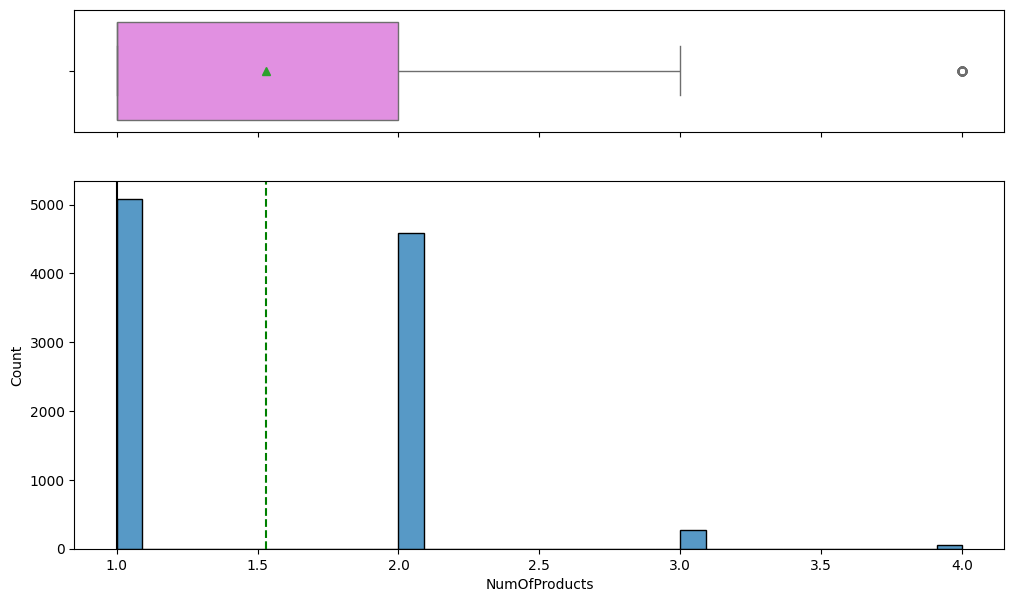

In [ ]:
histogram_boxplot(data,'NumOfProducts')

- Number of products has a right distribution with average of 1.5 and min and maximum of 1 and 4 respectively
- more than 70% of the customers have purchased one or 2 products

#### Observation on Balance

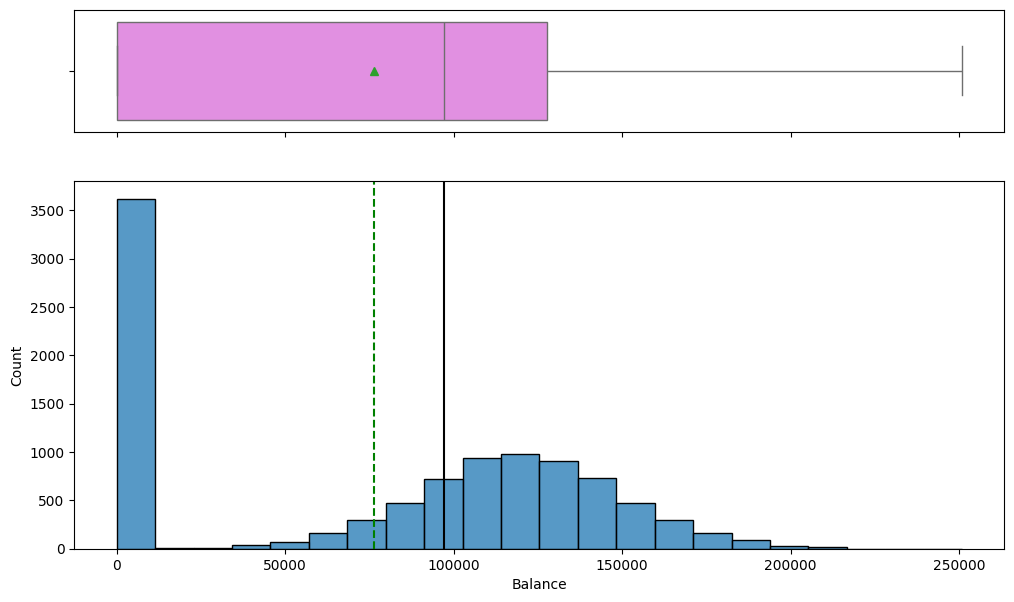

In [ ]:
histogram_boxplot(data,'Balance')

- **Account Balance** has a right skwed distribution with minimum of zero and maximum of almost 250000 and average of almost 76000

#### Observation on EstimatedSalary

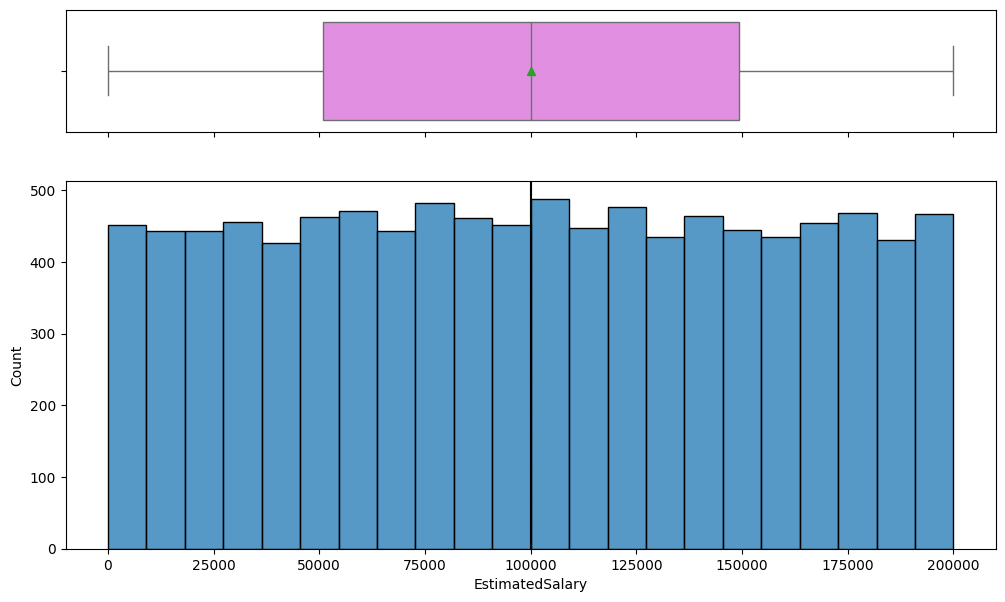

In [ ]:
histogram_boxplot(data,'EstimatedSalary')

- **EstimatedSalary** has a normal distribution with the min of 0 and maximum of 200K and average of 100k

#### Observation on HasCrCard

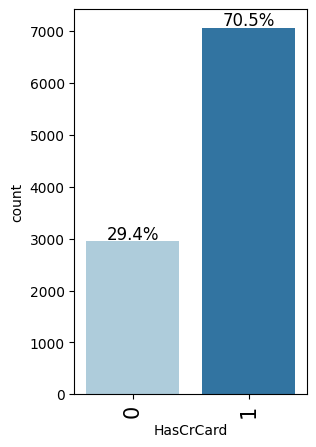

In [ ]:
labeled_barplot(data, "HasCrCard", perc=True )

- 70.5% of customers have credit card and the rest do not have

#### Observation on IsActiveMember

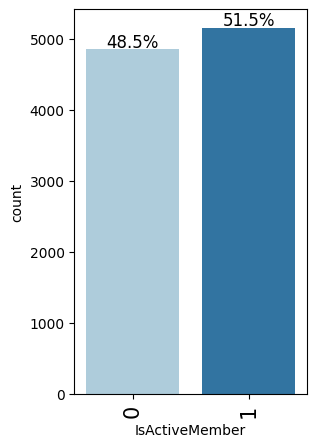

In [ ]:
labeled_barplot(data, "IsActiveMember", perc=True )

- 51.5% of customers are Active members while 48.5% are not active members
- This means that almost half of the customers are mot active members

#### Observation on Gender

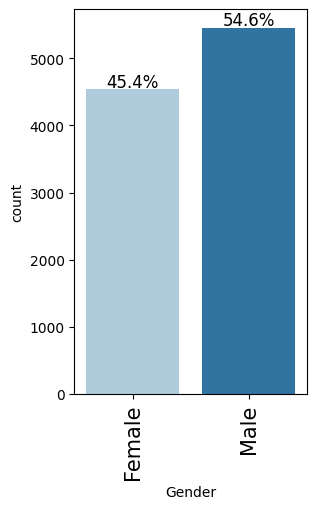

In [ ]:
labeled_barplot(data,"Gender", perc=True)

- 45.5% of customers are female and 54.6% are male

#### Observation on Geography

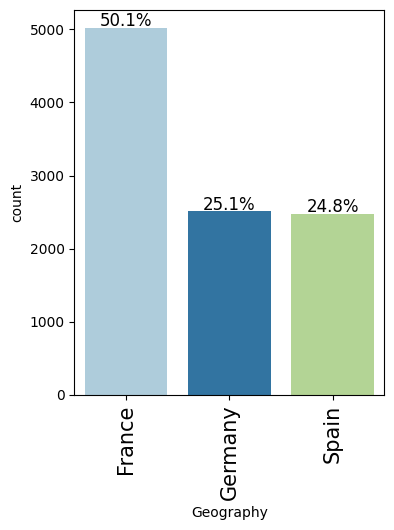

In [ ]:
labeled_barplot(data,"Geography", perc=True)

- 50.1% of the customers are from France followed by 25.1% from Germany and 24.8% from Spain

### Bivariate Analysis

- To get a better understanding of the variables that can discriminate between target variable **Exited** we do pairplot of numeric variables

In [ ]:
sns.pairplot(data,hue='Exited', diag_kind='hist')

Output hidden; open in https://colab.research.google.com to view.

- It seems that **NumOfProducts** and **Age** variable **can categorize target variable Exited** quite well

#### Let's observe the distribution of NumOfProducts with regards to Target variable

Exited           no   yes    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


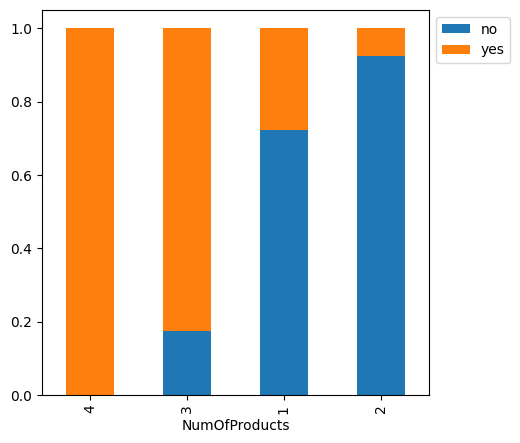

In [ ]:
stacked_barplot(data,'NumOfProducts', 'Exited')

- All customers with who bought 4 products have existed the bank
- 82% of customers with 3 products have exited the bank
- 7% of customers with 2 products have exited the bank
- 27% of the customers with 1 products have exited the bank

- This shows that customers are not happy with some specific products

#### Let's observe the distribution of Age with regards to Target variable

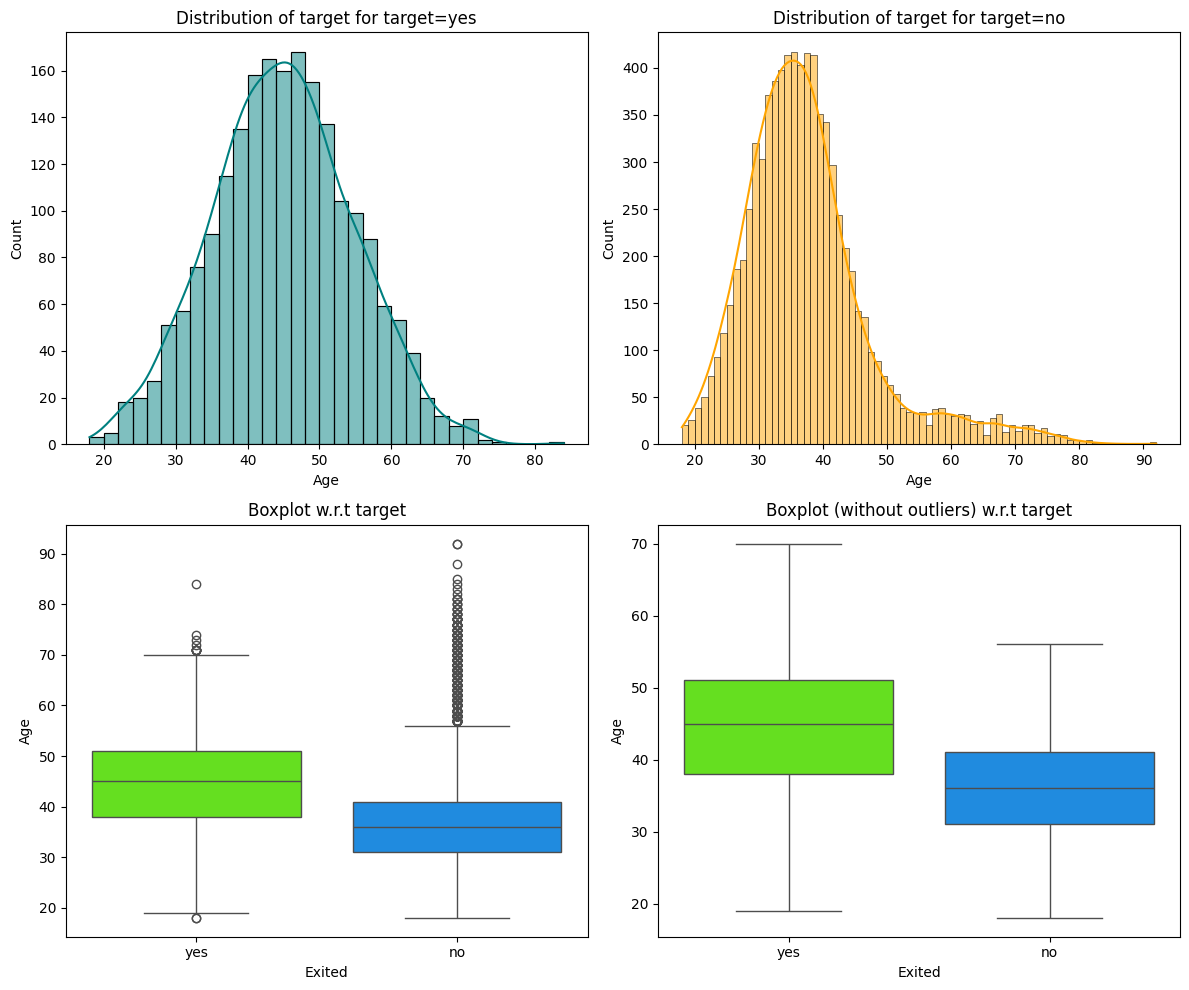

In [ ]:
distribution_plot_wrt_target(data, "Age", "Exited")

- Almost 75% of the customer who are exiting the bank are in their late 30's to 70 years old
- Also more than 50% of the customers who are not exiting the bank are between 30-43 years old.

#### Let's observe the distribution of CreditScore with regards to Target variable

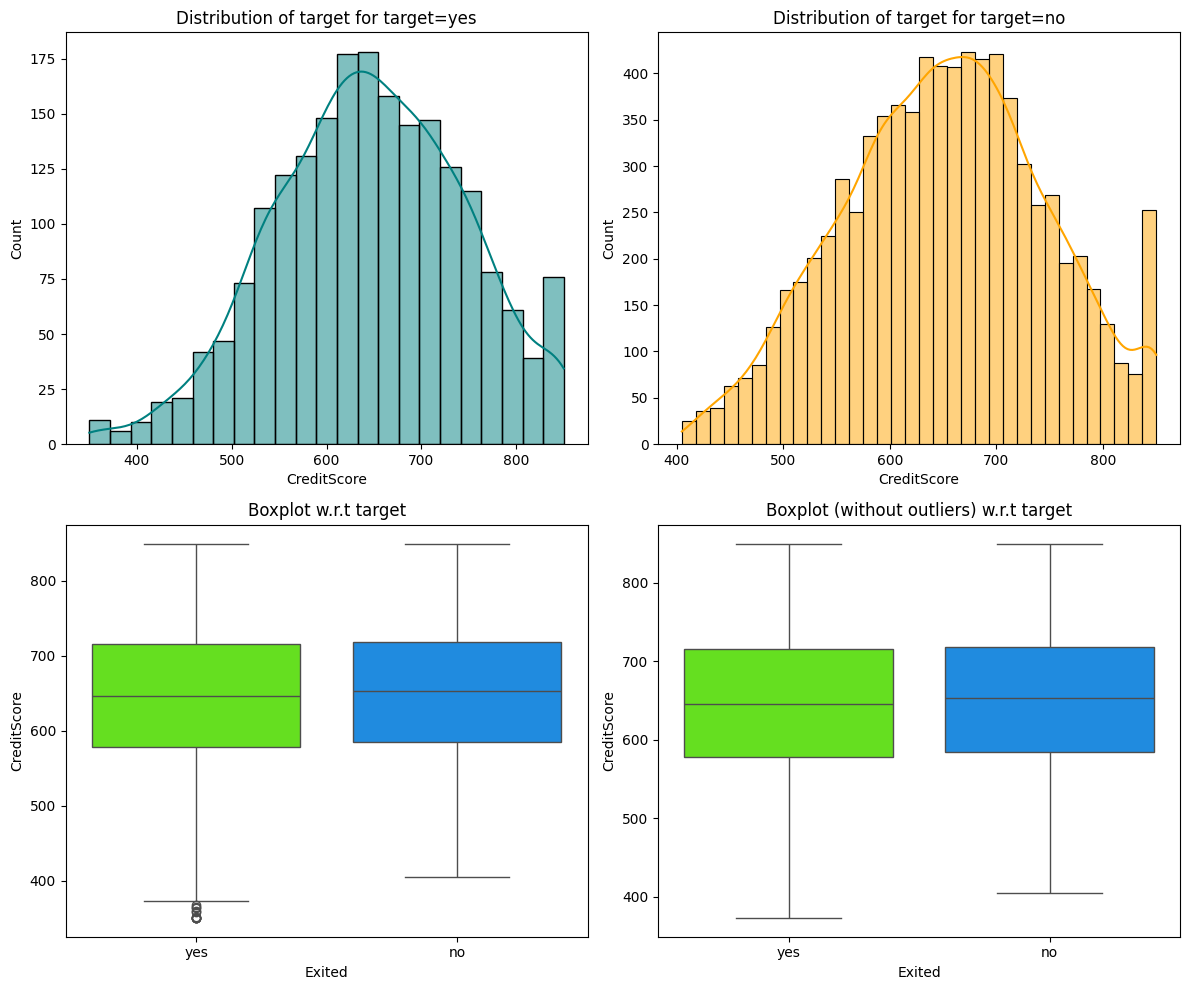

In [ ]:
distribution_plot_wrt_target(data, "CreditScore", "Exited")

#### Let's observe the distribution of Balance with regards to Target variable

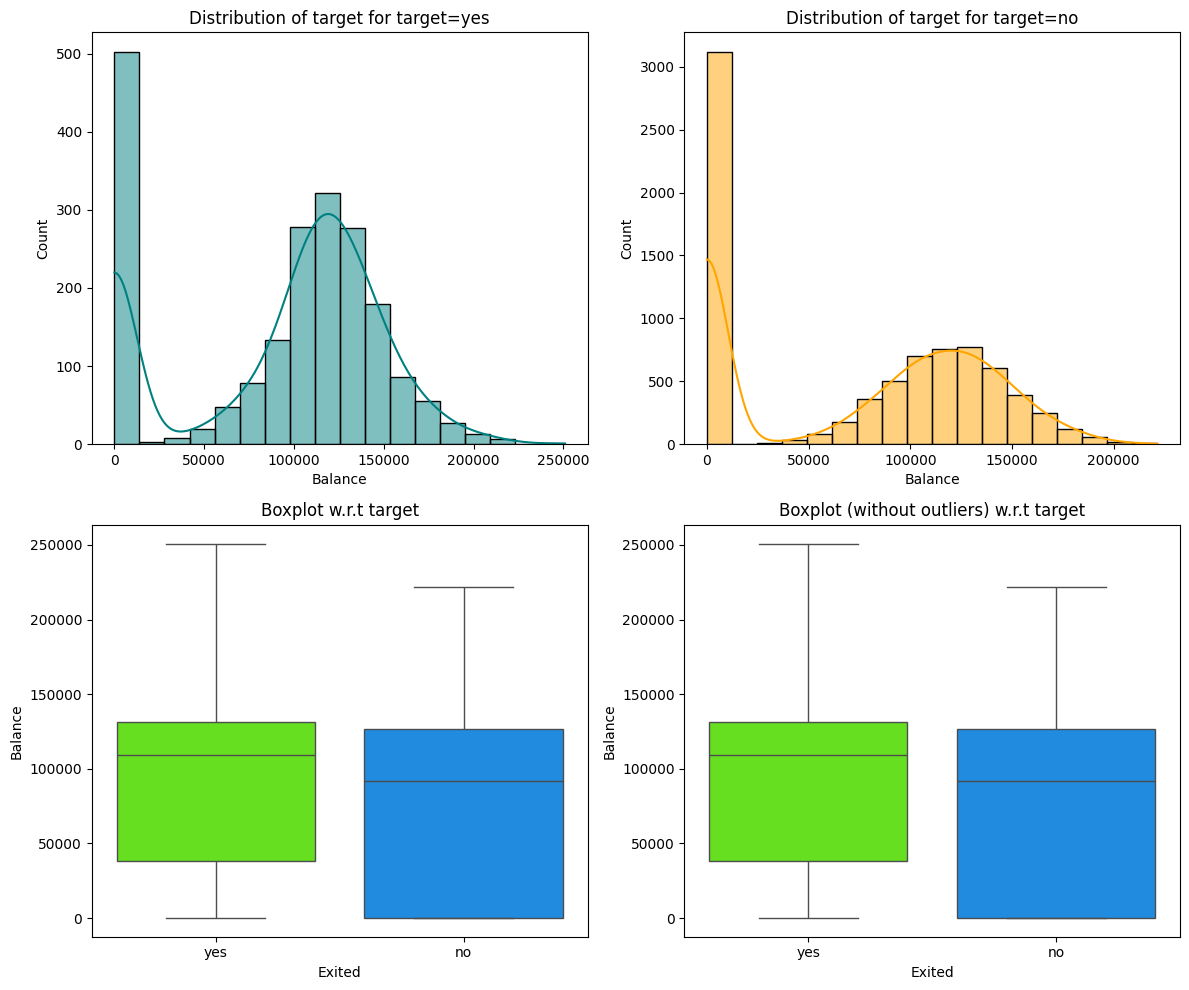

In [ ]:
distribution_plot_wrt_target(data, "Balance", "Exited")

- Most of the customers who exited the bank have the balance between 40k to 130K
- 75% of the customers who did not exit the bank have less than 125k balance

#### Let's observe the distribution of EstimatedSalary with regards to Target variable

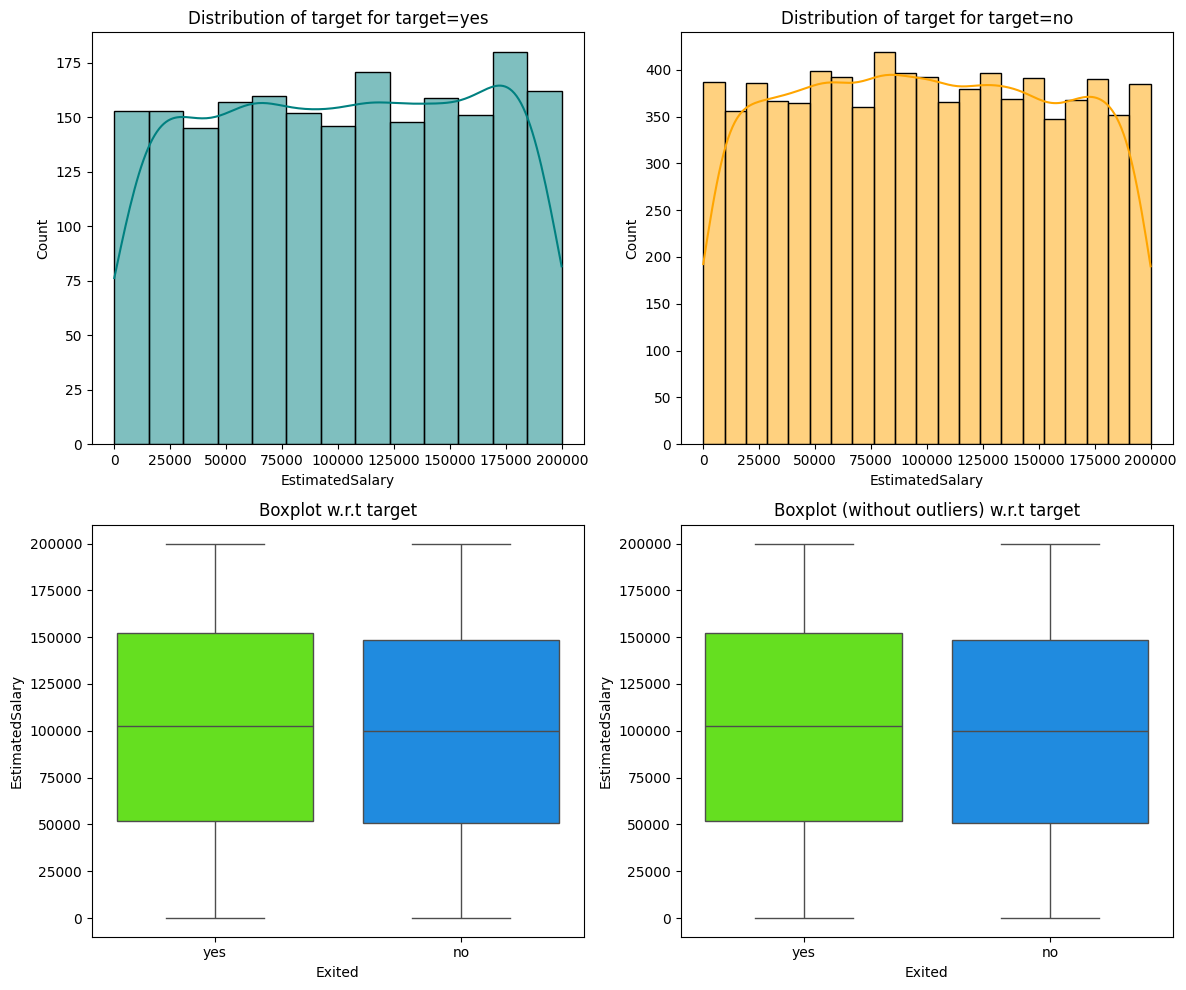

In [ ]:
distribution_plot_wrt_target(data, "EstimatedSalary","Exited")

- EstimatedSalary does not play that much role with regards to target variable

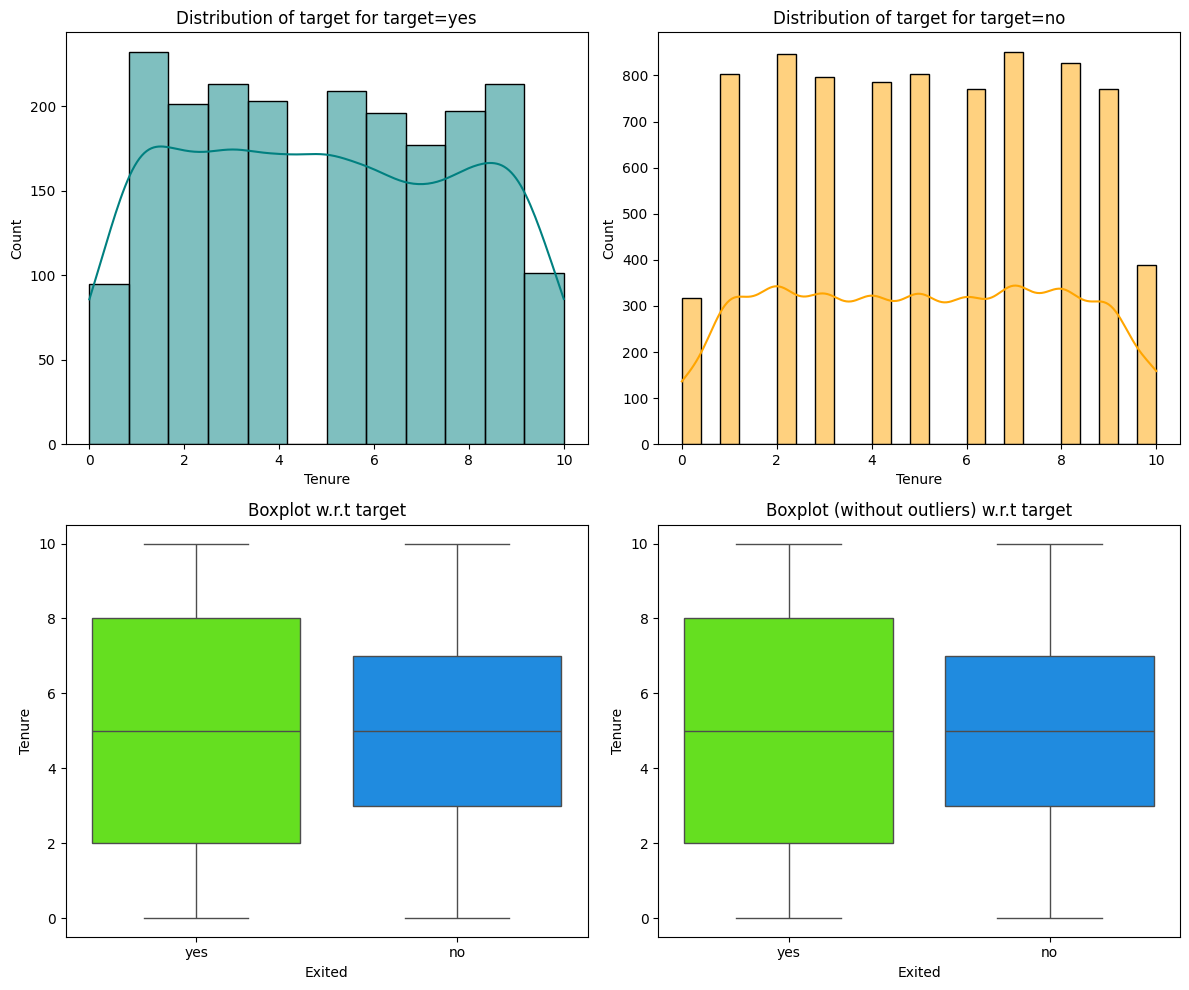

In [ ]:
distribution_plot_wrt_target(data, "Tenure","Exited")

- 50% of the customers who did not exit the bank have Tenure between 3 to 7
- 50% of the customers who exited the bank have Tenure between 2 to 8

#### Let's Observe the distribution of catgorical variables on the targer variable Exited

Exited    no   yes    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


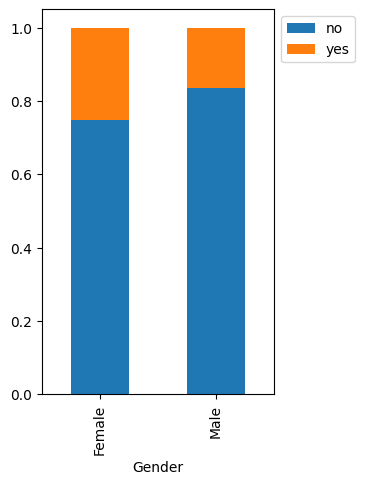

In [ ]:
stacked_barplot(data,'Gender', 'Exited')

- Although 45.4% of all customers are Female, almost 56% of exited customers are female and 44% are male

Exited       no   yes    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


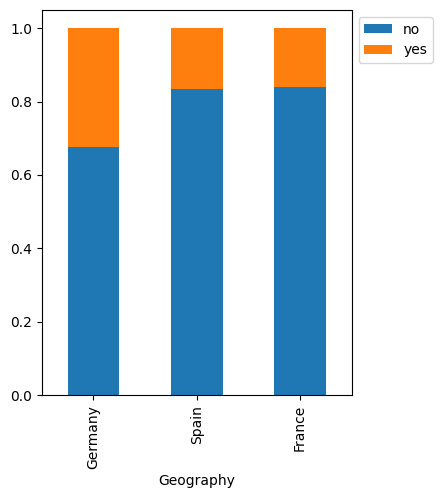

In [ ]:
stacked_barplot(data,'Geography', 'Exited')

- Although only 25% of total customers are from **Germany**, from all exited customers:
- 40% are from **Germany**
- 40% from **France**
- 20% from **Spain**

This shows that the bank is not popular in Germany

Exited            no   yes    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


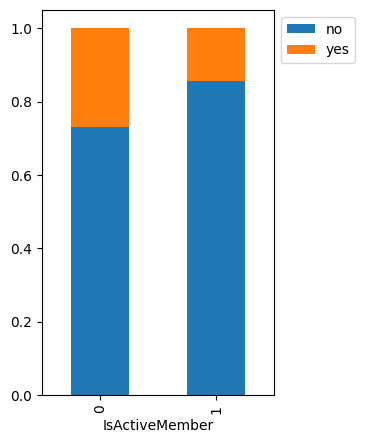

In [ ]:
stacked_barplot(data,'IsActiveMember', 'Exited')

- 64% of the customers who exited the bank were not Active members

#### Let's observe the correlation between numeric variables in data

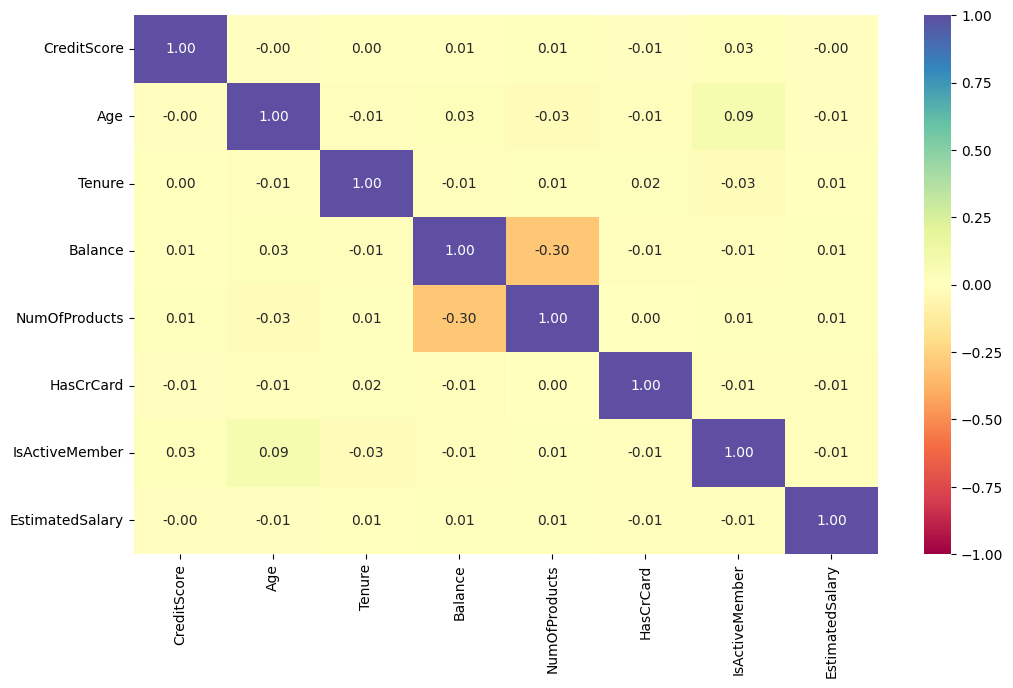

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

<a id='eda'></a>
### <a id='link'>Summary and Observation of EDA</a>

* The dataset has 10000 rows and 14 columns
* Only 3 variables are categorical and the rest all are numeric types.
* There is no missing values in any columns
  
**Data Cleaning**
* We droped "CustomerId" and "RowNumber" as they were unique for each customer and are not adding value to modeling.
* We also dropped Surname as its Customer Surname and is not adding value to the modling

**Observations from EDA**

* All customers with who bought 4 products have existed the bank

* 82% of customers with 3 products have exited the bank

* 7% of customers with 2 products have exited the bank

* 27% of the customers with 1 products have exited the bank

* This shows that customers are not happy with some specific products


* 64% of the customers who exited the bank were not Active members
* 51% of customers are from France followed by 25% from Germany and 24% from Spain. However 40% of exiting customers are from Germany
* Although 45.4% of all customers are Female, almost 56% of exited customers are female and 44% are male

**Correlation between variables**  
* There is a negative correlation between NumOfProducts and Balance



## Data Preprocessing

In [ ]:
data1 = df.copy()
data1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Dummy Variable Creation

In [ ]:
df = pd.get_dummies(df, dtype=int)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


### Train-validation-test Split

In [ ]:
x = df.drop(["Exited"], axis=1)
y = df["Exited"]

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

x_temp, x_test, y_temp, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

x_train, x_val, y_train, y_val = train_test_split(
    x_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(x_train.shape, x_val.shape, x_test.shape)

(6000, 13) (2000, 13) (2000, 13)


### Data Normalization

In [ ]:
to_be_scaled_columns = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
sc=StandardScaler()
temp = sc.fit(x_train[to_be_scaled_columns])
x_train[to_be_scaled_columns] = temp.transform(x_train[to_be_scaled_columns])
x_test[to_be_scaled_columns] = temp.transform(x_test[to_be_scaled_columns])
x_val[to_be_scaled_columns] = temp.transform(x_val[to_be_scaled_columns])

In [ ]:
# Checking the shape
print(f"x_train data shape is: {x_train.shape}")
print(f"y_train data shape is: {y_train.shape}")

print(f"x_val.shape data shape is: {x_val.shape}")
print(f"y_val.shape data shape is: {y_val.shape}" )

print(f"x_test.shape data shape is: {x_test.shape}")
print(f"y_test.shape data shape is: {y_test.shape}")

x_train data shape is: (6000, 13)
y_train data shape is: (6000,)
x_val.shape data shape is: (2000, 13)
y_val.shape data shape is: (2000,)
x_test.shape data shape is: (2000, 13)
y_test.shape data shape is: (2000,)


### Utility functions

In [ ]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

In [ ]:
#Defining the columns of the dataframe which are nothing but the hyper parameters and the metrics.
columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization","train loss","validation loss","train accuracy","validation accuracy","time (secs)"]

#Creating a pandas dataframe.
results = pd.DataFrame(columns=columns)

## Model Building

### Model Evaluation Criterion

### Model can make wrong predictions as:
* Predicting customer is exiting and but she/he does not exit the bank
* Predicting a customer is not exiting the bank but it exits the bank

### Which case is more important?
* Predicting that customer is not exiting the bank but they exit. It might make the bank loss and cost the bank a lot to replace that customer. It would be much less costly to keep the existing customers and not losing them.

### How to reduce this cost/loss i.e need to reduce False Negative?
* The bank would want **Recall** to be maximized, greater the **Recall** higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negative or in other words identifying the True Positive(i.e. Class 1) so that the Bank can identify the exiting customers so that the bank approach them and try to offer them better/other services to keep them stay.

We'll be using the same batch size and epochs throughout, so let's define two variables for the same

In [ ]:
batch_size = 32
epochs = 50

### Neural Network with SGD Optimizer

We'll start out with a baseline model having the following configuration:

1 input, 2 hidden, 1 output layers
relu and tanh activations for the first and second hidden layer respectively
he_normal and Xavier as the weight initializers for the first and second layers respectively
Stochastic Gradient Descent (SGD)

In [ ]:
set_global_random_seed()
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(64,activation="relu", input_dim = x_train.shape[1],kernel_initializer='he_normal'))
model_1.add(Dense(32,activation="tanh"))
model_1.add(Dense(1,activation = 'sigmoid'))

In [ ]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model_1.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
start = time.time()
history = model_1.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
188/188 [==============================] - 1s 3ms/step - loss: 0.4971 - accuracy: 0.7898 - val_loss: 0.4571 - val_accuracy: 0.7930
Epoch 2/50
188/188 [==============================] - 0s 2ms/step - loss: 0.4496 - accuracy: 0.7978 - val_loss: 0.4318 - val_accuracy: 0.7965
Epoch 3/50
188/188 [==============================] - 0s 2ms/step - loss: 0.4316 - accuracy: 0.8055 - val_loss: 0.4176 - val_accuracy: 0.8070
Epoch 4/50
188/188 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8110 - val_loss: 0.4079 - val_accuracy: 0.8095
Epoch 5/50
188/188 [==============================] - 0s 2ms/step - loss: 0.4100 - accuracy: 0.8182 - val_loss: 0.4000 - val_accuracy: 0.8150
Epoch 6/50
188/188 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8238 - val_loss: 0.3933 - val_accuracy: 0.8265
Epoch 7/50
188/188 [==============================] - 0s 3ms/step - loss: 0.3957 - accuracy: 0.8272 - val_loss: 0.3881 - val_accuracy: 0.8320
Epoch 

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  26.91390061378479


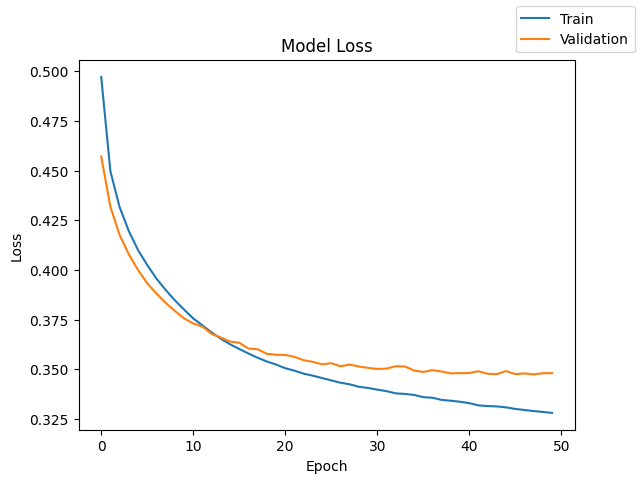

In [ ]:
plot(history,'loss')

- There's a steep decrease in the loss from epoch 1 to 5.
- After the 10th epoch, the validation loss is always more than the training loss and starts to diverge.
- Thereafter, the steepness is reduced, i.e., the loss decreases at a reduced pace.

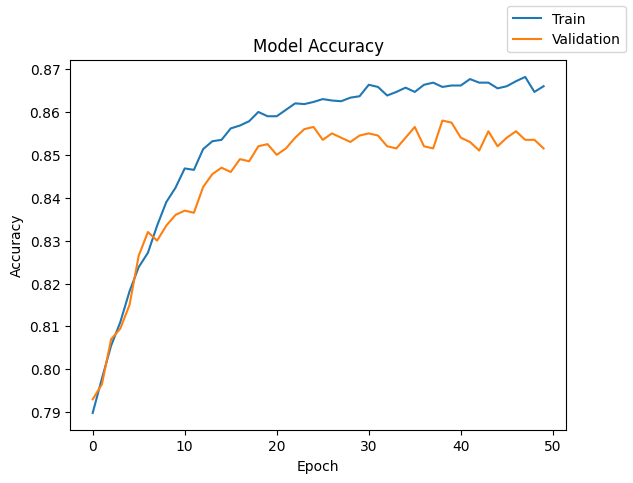

In [ ]:
plot(history,'accuracy')

In [ ]:
results.loc[0] = [2,[64,32],["relu","tanh"],50,32,"sgd",["0.01", "-"],["he","xavier"],"-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,2,"[64, 32]","[relu, tanh]",50,32,sgd,"[0.01, -]","[he, xavier]",-,0.328022,0.348066,0.866,0.8515,26.91


In [ ]:
score = model_1.evaluate(x_test, y_test)
print(score)

63/63 [==============================] - 0s 2ms/step - loss: 0.3557 - accuracy: 0.8635
[0.35566893219947815, 0.8634999990463257]


63/63 [==============================] - 0s 1ms/step


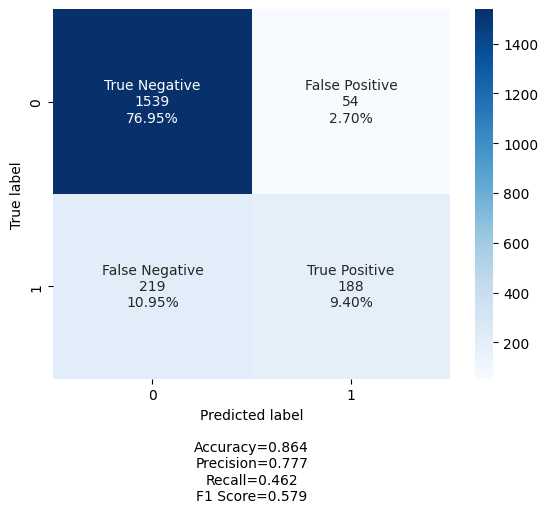

In [ ]:
import seaborn as sn
y_pred1 = model_1.predict(x_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0

cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm2,
                      group_names=labels,
                      cmap='Blues')

#### Conclusion:

- With the initial model with 2 hidden layer and default SGD as optimizer we got
- 85% of accuracy on validation data
- Almost 46.5% recall.
- Let's see if we can improve recall using by using **SGD with momentum**

### Neural Network with SGD Optimizer With Momentum

We'll add momentum to SGD optimizer with the same network structure:

- 1 input, 2 hidden, 1 output layers
- relu and tanh activations for the first and second hidden layer respectively - he_normal and Xavier as the wight initializers for the first and second layers respectively
- Stochastic Gradient Descent (SGD) with momentum

In [ ]:
set_global_random_seed()
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(64,activation="relu", input_dim = x_train.shape[1],kernel_initializer='he_normal'))
model_1.add(Dense(32,activation="tanh"))
model_1.add(Dense(1,activation = 'sigmoid'))

In [ ]:
mom = 0.3
optimizer = keras.optimizers.SGD(momentum=mom)    # defining SGD with momentum as the optimizer to be used
model_1.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
start = time.time()
history = model_1.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
188/188 [==============================] - 1s 3ms/step - loss: 0.4856 - accuracy: 0.7923 - val_loss: 0.4444 - val_accuracy: 0.7940
Epoch 2/50
188/188 [==============================] - 1s 3ms/step - loss: 0.4380 - accuracy: 0.8042 - val_loss: 0.4196 - val_accuracy: 0.8035
Epoch 3/50
188/188 [==============================] - 1s 3ms/step - loss: 0.4194 - accuracy: 0.8113 - val_loss: 0.4053 - val_accuracy: 0.8110
Epoch 4/50
188/188 [==============================] - 0s 2ms/step - loss: 0.4067 - accuracy: 0.8193 - val_loss: 0.3957 - val_accuracy: 0.8240
Epoch 5/50
188/188 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.8275 - val_loss: 0.3876 - val_accuracy: 0.8260
Epoch 6/50
188/188 [==============================] - 0s 3ms/step - loss: 0.3885 - accuracy: 0.8338 - val_loss: 0.3810 - val_accuracy: 0.8360
Epoch 7/50
188/188 [==============================] - 0s 2ms/step - loss: 0.3814 - accuracy: 0.8398 - val_loss: 0.3762 - val_accuracy: 0.8385
Epoch 

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  28.31616520881653


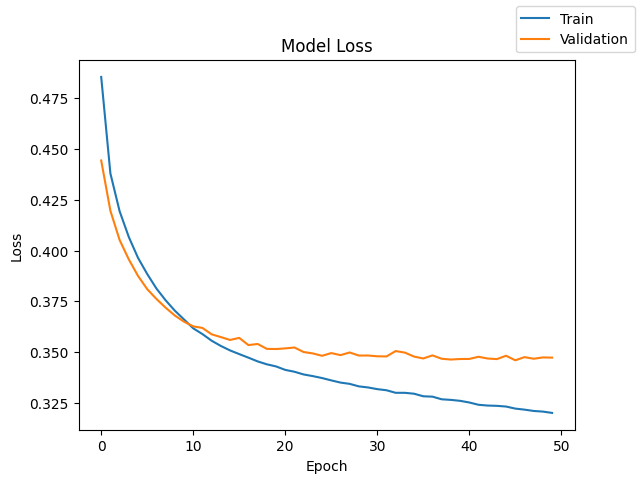

In [ ]:
plot(history,'loss')

- With giving some momentum training loss is getting decreased while validation loss starts diverging/increasing after epoch 45

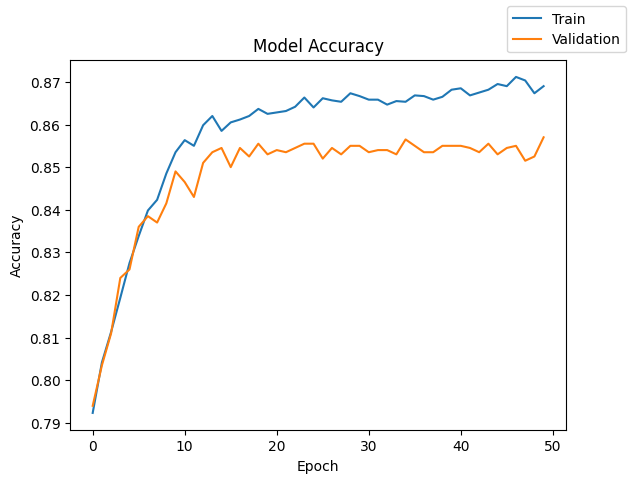

In [ ]:
plot(history,'accuracy')

In [ ]:
results.loc[1] = [2,[64,32],["relu","tanh"],50,32,"sgd with momentum",["0.01", mom],["he","xavier"],"-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,2,"[64, 32]","[relu, tanh]",50,32,sgd,"[0.01, -]","[he, xavier]",-,0.328022,0.348066,0.866,0.8515,26.91
1,2,"[64, 32]","[relu, tanh]",50,32,sgd with momentum,"[0.01, 0.3]","[he, xavier]",-,0.320067,0.347306,0.869,0.8570,28.32


In [ ]:
score = model_1.evaluate(x_test, y_test)
print(score)

63/63 [==============================] - 0s 2ms/step - loss: 0.3543 - accuracy: 0.8620
[0.3542898893356323, 0.8619999885559082]


63/63 [==============================] - 0s 1ms/step


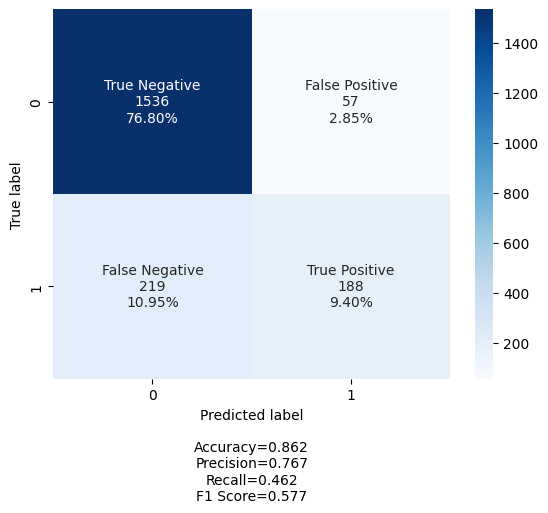

In [ ]:
import seaborn as sn
y_pred1 = model_1.predict(x_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0

cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm2,
                      group_names=labels,
                      cmap='Blues')

#### Conclusion:

- With the initial model with 2 hidden layers and SGD with momentum as optimizer we got
- almost 86% of accuracy on validation data
- almost 46% recall.
- **Adding SGD with momentum** has increased recall a bit
- Let's see if we can improve recall using **Adam optimizer**

## Model Performance Improvement

### Neural Network with Adam Optimizer

We'll change the optimizer to Adam with the same network structure:

- 1 input, 2 hidden, 1 output layers
- relu and tanh activations for the first and second hidden layer respectively
- he_normal and Xavier as the wight initializers for the first and second layers respectively
- Adam optimizer

In [ ]:
set_global_random_seed()
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(64,activation="relu", input_dim = x_train.shape[1],kernel_initializer='he_normal'))
model_1.add(Dense(32,activation="tanh"))
model_1.add(Dense(1,activation = 'sigmoid'))

In [ ]:

optimizer = keras.optimizers.Adam() # defining Adam as the optimizer to be used
model_1.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
start = time.time()
history = model_1.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
188/188 [==============================] - 1s 3ms/step - loss: 0.4344 - accuracy: 0.8110 - val_loss: 0.3857 - val_accuracy: 0.8340
Epoch 2/50
188/188 [==============================] - 0s 3ms/step - loss: 0.3792 - accuracy: 0.8418 - val_loss: 0.3647 - val_accuracy: 0.8440
Epoch 3/50
188/188 [==============================] - 1s 3ms/step - loss: 0.3580 - accuracy: 0.8580 - val_loss: 0.3593 - val_accuracy: 0.8455
Epoch 4/50
188/188 [==============================] - 1s 3ms/step - loss: 0.3472 - accuracy: 0.8605 - val_loss: 0.3523 - val_accuracy: 0.8530
Epoch 5/50
188/188 [==============================] - 1s 3ms/step - loss: 0.3406 - accuracy: 0.8650 - val_loss: 0.3497 - val_accuracy: 0.8540
Epoch 6/50
188/188 [==============================] - 1s 3ms/step - loss: 0.3355 - accuracy: 0.8623 - val_loss: 0.3492 - val_accuracy: 0.8550
Epoch 7/50
188/188 [==============================] - 1s 3ms/step - loss: 0.3313 - accuracy: 0.8652 - val_loss: 0.3478 - val_accuracy: 0.8530
Epoch 

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  41.80130696296692


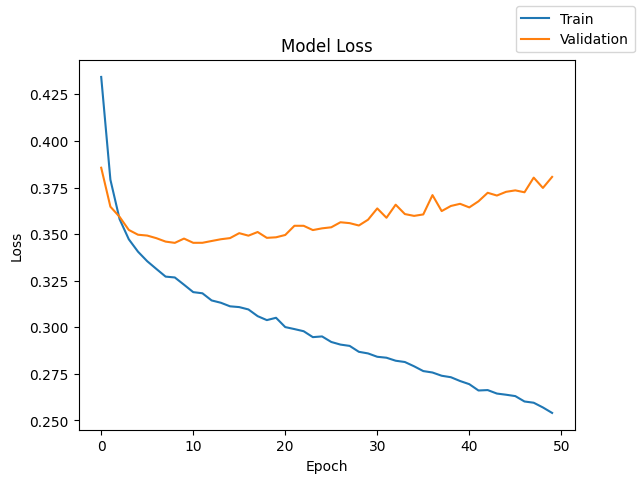

In [ ]:
plot(history,'loss')

- There is a steep decrease in both training and validation loss until the second epoch.
- After alomost epoch 15, while training loss is keep decreasing, validation loss start increasing a bit. which migth be a sign of model is not being able to find local minimum or overfitting.
- Learning time has also increased

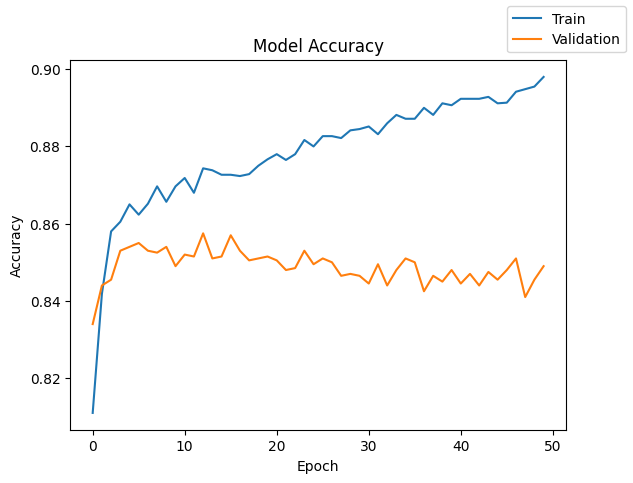

In [ ]:
plot(history,'accuracy')

In [ ]:
results.loc[2] = [2,[64,32],["relu","tanh"],50,32,"Adam",["0.001", "-"],["he","xavier"],"-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,2,"[64, 32]","[relu, tanh]",50,32,sgd,"[0.01, -]","[he, xavier]",-,0.328022,0.348066,0.866,0.8515,26.91
1,2,"[64, 32]","[relu, tanh]",50,32,sgd with momentum,"[0.01, 0.3]","[he, xavier]",-,0.320067,0.347306,0.869,0.8570,28.32
2,2,"[64, 32]","[relu, tanh]",50,32,Adam,"[0.001, -]","[he, xavier]",-,0.254058,0.380731,0.898,0.8490,41.80


In [ ]:
score = model_1.evaluate(x_test, y_test)
print(score)

63/63 [==============================] - 0s 2ms/step - loss: 0.3784 - accuracy: 0.8580
[0.37843918800354004, 0.8579999804496765]


63/63 [==============================] - 0s 1ms/step


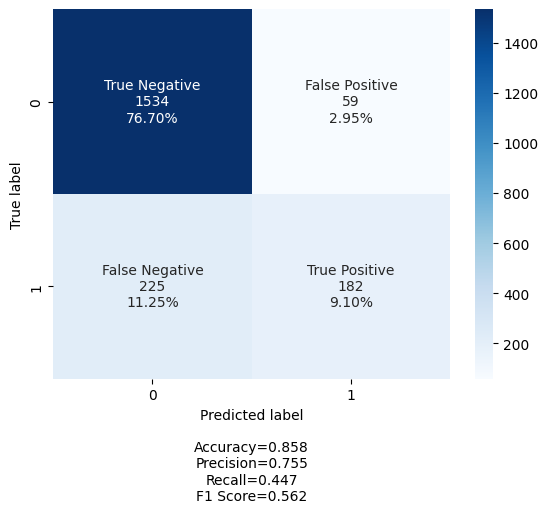

In [ ]:
import seaborn as sn
y_pred1 = model_1.predict(x_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0

cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm2,
                      group_names=labels,
                      cmap='Blues')

#### Conclusion:

- Using Adam optimizer with the initila netweork and default learning rate  has shown the sign model not being able to find local minimum after epoch 20 and is osciliating
Network structure is
- 2 hidden layers and Adam optimizer
- ~89% accuracy on traing data and ~85% of accuracy on validation data
- recall has reduced compare to SGD with momentum.
- Let's see if we can improve model performance using **Adam with reduced learning rate**

### Neural Network with Adam Optimizer with reduced learning rate

We'll reduce initial learning rate that Adam starts with to see if the model can perform better

In [ ]:
set_global_random_seed()
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(64,activation="relu", input_dim = x_train.shape[1],kernel_initializer='he_normal'))
model_1.add(Dense(32,activation="tanh"))
model_1.add(Dense(1,activation = 'sigmoid'))

In [ ]:
lr = 1e-4
optimizer = keras.optimizers.Adam(learning_rate=lr) # defining Adam as the optimizer to be used with reduced learning rate
model_1.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
start = time.time()
history = model_1.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
188/188 [==============================] - 7s 19ms/step - loss: 0.5246 - accuracy: 0.7832 - val_loss: 0.4816 - val_accuracy: 0.7955
Epoch 2/50
188/188 [==============================] - 1s 8ms/step - loss: 0.4680 - accuracy: 0.7967 - val_loss: 0.4476 - val_accuracy: 0.7955
Epoch 3/50
188/188 [==============================] - 1s 7ms/step - loss: 0.4454 - accuracy: 0.8038 - val_loss: 0.4301 - val_accuracy: 0.8010
Epoch 4/50
188/188 [==============================] - 1s 7ms/step - loss: 0.4318 - accuracy: 0.8075 - val_loss: 0.4189 - val_accuracy: 0.8085
Epoch 5/50
188/188 [==============================] - 1s 7ms/step - loss: 0.4220 - accuracy: 0.8125 - val_loss: 0.4105 - val_accuracy: 0.8145
Epoch 6/50
188/188 [==============================] - 1s 8ms/step - loss: 0.4138 - accuracy: 0.8187 - val_loss: 0.4037 - val_accuracy: 0.8185
Epoch 7/50
188/188 [==============================] - 1s 7ms/step - loss: 0.4069 - accuracy: 0.8235 - val_loss: 0.3981 - val_accuracy: 0.8185
Epoch

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  85.52026915550232


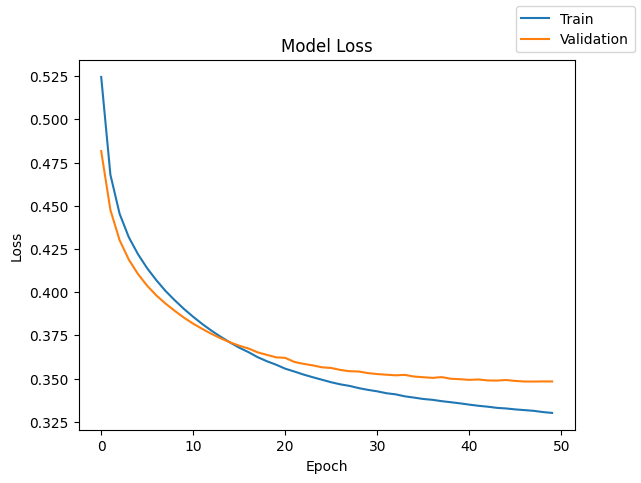

In [ ]:
plot(history,'loss')

- There is a steep decrease in both training and validation loss in the initial epoches.
- reducing learbing rate in Adam helps smoother reduction of loss in both training and validation data

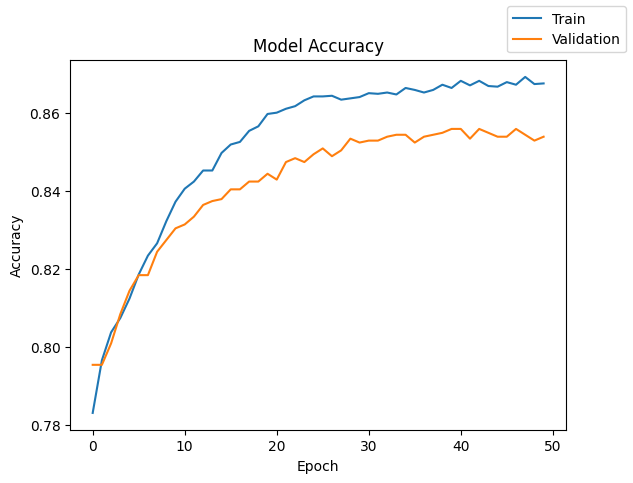

In [ ]:
plot(history,'accuracy')

In [ ]:
results.loc[3] = [2,[64,32],["relu","tanh"],50,32,"Adam",[lr, "-"],["he","xavier"],"-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,2,"[64, 32]","[relu, tanh]",50,32,sgd,"[0.01, -]","[he, xavier]",-,0.328022,0.348066,0.866000,0.8515,43.26
1,2,"[64, 32]","[relu, tanh]",50,32,sgd with momentum,"[0.01, 0.3]","[he, xavier]",-,0.320067,0.347306,0.869000,0.8570,41.59
2,2,"[64, 32]","[relu, tanh]",50,32,Adam,"[0.001, -]","[he, xavier]",-,0.254058,0.380731,0.898000,0.8490,41.89
3,2,"[64, 32]","[relu, tanh]",50,32,Adam,"[0.0001, -]","[he, xavier]",-,0.330203,0.353156,0.868333,0.8590,38.00


In [ ]:
score = model_1.evaluate(x_test, y_test)
print(score)

63/63 [==============================] - 0s 2ms/step - loss: 0.3554 - accuracy: 0.8600
[0.3553573489189148, 0.8600000143051147]


63/63 [==============================] - 0s 1ms/step


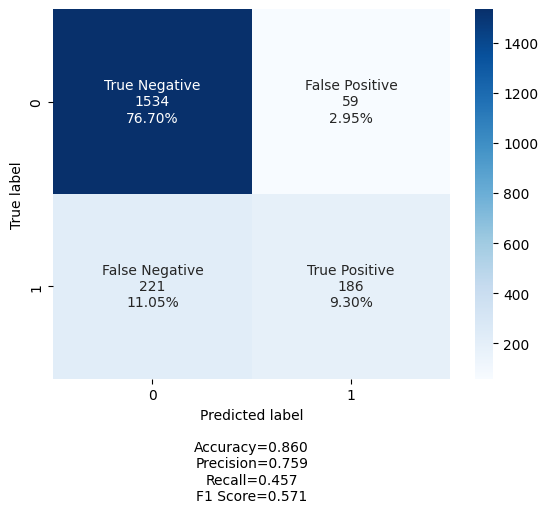

In [ ]:
import seaborn as sn
y_pred1 = model_1.predict(x_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0

cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm2,
                      group_names=labels,
                      cmap='Blues')

#### Conclusion:

- Using Adam optimizer with reduced learningrate has smoothen the loss reduction and accuracy increase

Network structure is
- 2 hidden layers and Adam optimizer
- almost 86% accuracy on traing data and 85% of accuracy on validation data
- This shows model has been generalized better
- recall has increased to the level of SGD with momentum.
- We will keep the learning rate lr=1e-4
- Let's see if we can improve model performance using **Adam optimizer with Dropout**

### Neural Network with Adam Optimizer With reduced Leaning rate and Dropout

We'll introduce some Dropout layers to the network with Adam optimizer to see if the model can perform better

In [ ]:
set_global_random_seed()
tf.keras.backend.clear_session()

In [ ]:
# defining the dropout ratio
# 0.2 means 20% of the neurons will be switched off
dropout_rate = 0.2

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(64,activation="relu", input_dim = x_train.shape[1],kernel_initializer='he_normal'))
model_1.add(Dropout(dropout_rate))
model_1.add(Dense(32,activation="tanh"))
model_1.add(Dense(1,activation = 'sigmoid'))

In [ ]:
lr = 1e-4
optimizer = keras.optimizers.Adam(learning_rate=lr) # defining Adam as the optimizer to be used with reduced learning rate
model_1.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
start = time.time()
history = model_1.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
188/188 [==============================] - 2s 5ms/step - loss: 0.5439 - accuracy: 0.7688 - val_loss: 0.4866 - val_accuracy: 0.7950
Epoch 2/50
188/188 [==============================] - 1s 3ms/step - loss: 0.4866 - accuracy: 0.7943 - val_loss: 0.4533 - val_accuracy: 0.7955
Epoch 3/50
188/188 [==============================] - 1s 4ms/step - loss: 0.4658 - accuracy: 0.7977 - val_loss: 0.4377 - val_accuracy: 0.7965
Epoch 4/50
188/188 [==============================] - 1s 3ms/step - loss: 0.4543 - accuracy: 0.8025 - val_loss: 0.4265 - val_accuracy: 0.8000
Epoch 5/50
188/188 [==============================] - 1s 4ms/step - loss: 0.4432 - accuracy: 0.8097 - val_loss: 0.4183 - val_accuracy: 0.8055
Epoch 6/50
188/188 [==============================] - 1s 4ms/step - loss: 0.4329 - accuracy: 0.8100 - val_loss: 0.4120 - val_accuracy: 0.8090
Epoch 7/50
188/188 [==============================] - 1s 3ms/step - loss: 0.4297 - accuracy: 0.8115 - val_loss: 0.4077 - val_accuracy: 0.8125
Epoch 

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  28.869553804397583


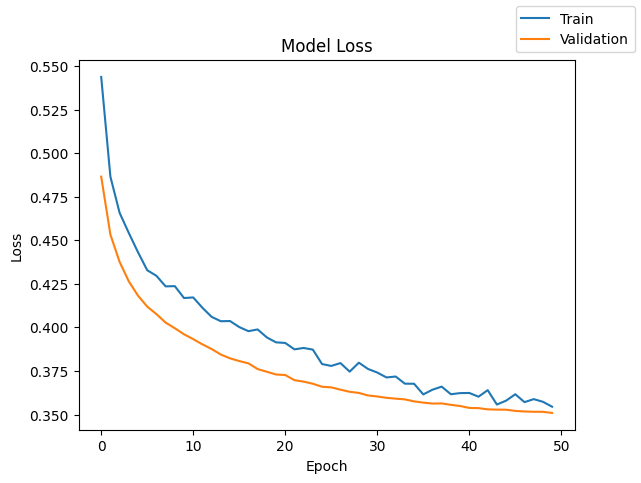

In [ ]:
plot(history,'loss')

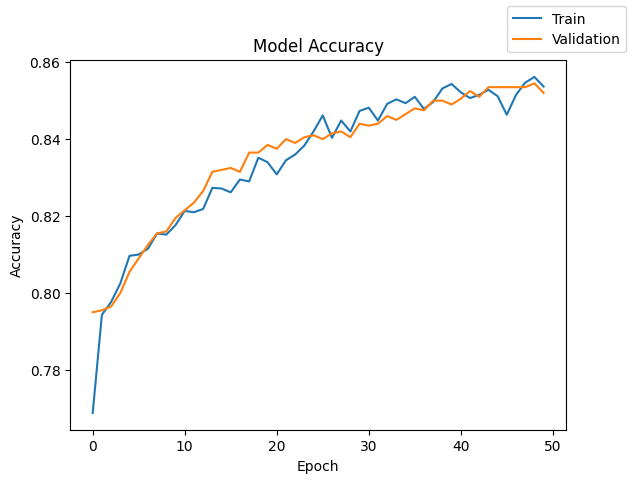

In [ ]:
plot(history,'accuracy')

In [ ]:
results.loc[4] = [2,[64,32],["relu","tanh"],50,32,"Adam",[lr, "-"],["he","xavier"],"dropout (0.2)",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,2,"[64, 32]","[relu, tanh]",50,32,sgd,"[0.01, -]","[he, xavier]",-,0.328022,0.348066,0.866000,0.8515,26.91
1,2,"[64, 32]","[relu, tanh]",50,32,sgd with momentum,"[0.01, 0.3]","[he, xavier]",-,0.320067,0.347306,0.869000,0.8570,28.32
2,2,"[64, 32]","[relu, tanh]",50,32,Adam,"[0.001, -]","[he, xavier]",-,0.254058,0.380731,0.898000,0.8490,41.80
3,2,"[64, 32]","[relu, tanh]",50,32,Adam,"[0.0001, -]","[he, xavier]",-,0.330129,0.348333,0.867667,0.8540,85.52
4,2,"[64, 32]","[relu, tanh]",50,32,Adam,"[0.0001, -]","[he, xavier]",dropout (0.2),0.354475,0.350907,0.853667,0.8520,28.87


In [ ]:
score = model_1.evaluate(x_test, y_test)
print(score)

63/63 [==============================] - 0s 2ms/step - loss: 0.3580 - accuracy: 0.8570
[0.35795438289642334, 0.8569999933242798]


63/63 [==============================] - 0s 1ms/step


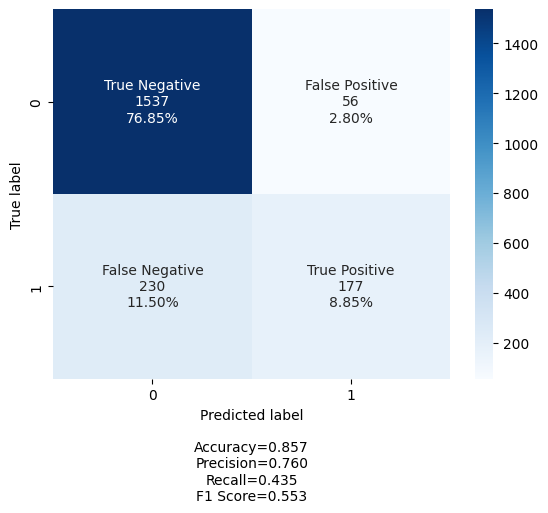

In [ ]:
import seaborn as sn
y_pred1 = model_1.predict(x_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0

cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm2,
                      group_names=labels,
                      cmap='Blues')

#### Conclusion:

- Adding Dropout to Adam optimizer with reduced learning rate:
- made the training and validation accuracy closer to each other however has not improve the model.
- While training and validation accuracy has reduced slightly, Recall has reduced more
- We will try to do overcome class imbalance using SMOTE OverSampling

### Oversampling train data using SMOTE technique

In [ ]:
(df.Exited.value_counts())/(df.Exited.count())

Exited
0    0.7963
1    0.2037
Name: count, dtype: float64

* There is a class imbalanced between target classes
* We use SMOTE oversampling method to overcome the challenge

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
x_train_over, y_train_over = sm.fit_resample(x_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of x_train_over: {}".format(x_train_over.shape))
print("After Oversampling, the shape of y_train_over: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 1222
Before Oversampling, counts of label 'No': 4778 

After Oversampling, counts of label 'Yes': 4778
After Oversampling, counts of label 'No': 4778 

After Oversampling, the shape of x_train_over: (9556, 13)
After Oversampling, the shape of y_train_over: (9556,) 



### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

We'll train the initial network with SGD optimizer, using Balanced data that is done by SMOTE.

- network structureis :
- 1 input, 2 hidden, 1 output layers
- relu and tanh activations for the first and second hidden layer respectively - he_normal and Xavier as the wight initializers for the first and second layers respectively
- Stochastic Gradient Descent (SGD)

In [ ]:
set_global_random_seed()
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(64,activation="relu", input_dim = x_train.shape[1],kernel_initializer='he_normal'))
model_1.add(Dense(32,activation="tanh"))
model_1.add(Dense(1,activation = 'sigmoid'))

In [ ]:
optimizer = keras.optimizers.SGD()    # defining SGD with momentum as the optimizer to be used
model_1.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
start = time.time()
history = model_1.fit(x_train_over, y_train_over, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
299/299 [==============================] - 1s 3ms/step - loss: 0.6210 - accuracy: 0.6632 - val_loss: 0.5427 - val_accuracy: 0.7535
Epoch 2/50
299/299 [==============================] - 1s 3ms/step - loss: 0.5325 - accuracy: 0.7454 - val_loss: 0.5053 - val_accuracy: 0.7665
Epoch 3/50
299/299 [==============================] - 1s 3ms/step - loss: 0.5005 - accuracy: 0.7680 - val_loss: 0.4922 - val_accuracy: 0.7665
Epoch 4/50
299/299 [==============================] - 1s 3ms/step - loss: 0.4811 - accuracy: 0.7752 - val_loss: 0.4671 - val_accuracy: 0.7820
Epoch 5/50
299/299 [==============================] - 1s 3ms/step - loss: 0.4669 - accuracy: 0.7841 - val_loss: 0.4780 - val_accuracy: 0.7685
Epoch 6/50
299/299 [==============================] - 1s 3ms/step - loss: 0.4559 - accuracy: 0.7883 - val_loss: 0.4592 - val_accuracy: 0.7810
Epoch 7/50
299/299 [==============================] - 1s 2ms/step - loss: 0.4468 - accuracy: 0.7937 - val_loss: 0.4557 - val_accuracy: 0.7810
Epoch 

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  41.53566217422485


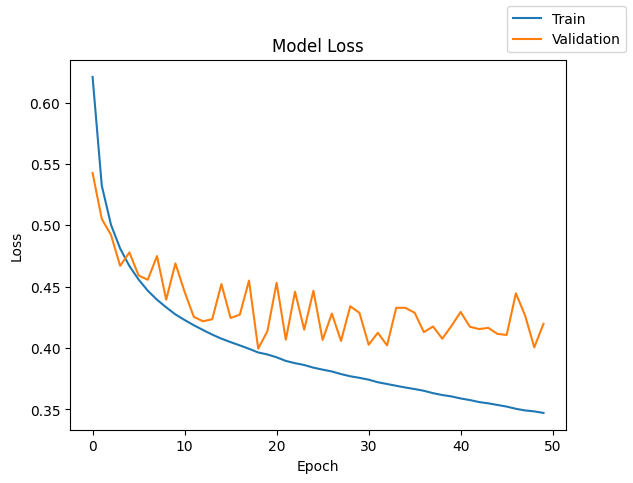

In [ ]:
plot(history,'loss')

- Training model with Oversampled data and SGD starts doing some osciliations in reducing validation loss. While the training loss is decreasing validation loss is not

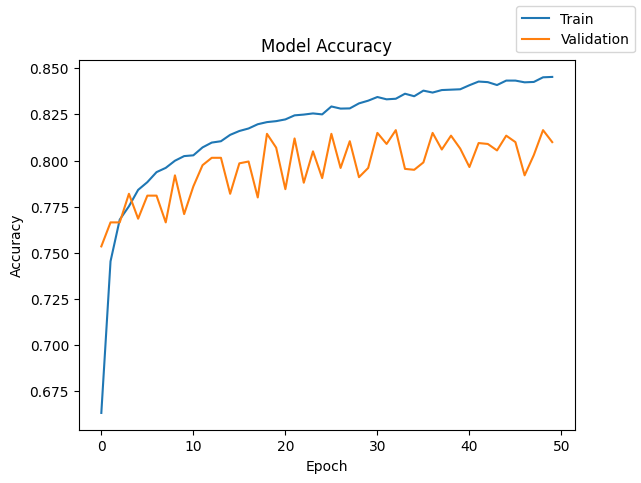

In [ ]:
plot(history,'accuracy')

In [ ]:
results.loc[5] = [2,[64,32],["relu","tanh"],50,32,"SMOTE oversampled sgd",["0.01", "-"],["he","xavier"],"-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,2,"[64, 32]","[relu, tanh]",50,32,sgd,"[0.01, -]","[he, xavier]",-,0.328022,0.348066,0.866000,0.8515,26.91
1,2,"[64, 32]","[relu, tanh]",50,32,sgd with momentum,"[0.01, 0.3]","[he, xavier]",-,0.320067,0.347306,0.869000,0.8570,28.32
2,2,"[64, 32]","[relu, tanh]",50,32,Adam,"[0.001, -]","[he, xavier]",-,0.254058,0.380731,0.898000,0.8490,41.80
3,2,"[64, 32]","[relu, tanh]",50,32,Adam,"[0.0001, -]","[he, xavier]",-,0.330129,0.348333,0.867667,0.8540,85.52
4,2,"[64, 32]","[relu, tanh]",50,32,Adam,"[0.0001, -]","[he, xavier]",dropout (0.2),0.354475,0.350907,0.853667,0.8520,28.87
5,2,"[64, 32]","[relu, tanh]",50,32,SMOTE oversampled sgd,"[0.01, 0.3]","[he, xavier]",-,0.347185,0.419821,0.845333,0.8100,41.54


In [ ]:
score = model_1.evaluate(x_test, y_test)
print(score)

63/63 [==============================] - 0s 1ms/step - loss: 0.4308 - accuracy: 0.7980
[0.43079879879951477, 0.7979999780654907]


63/63 [==============================] - 0s 1ms/step


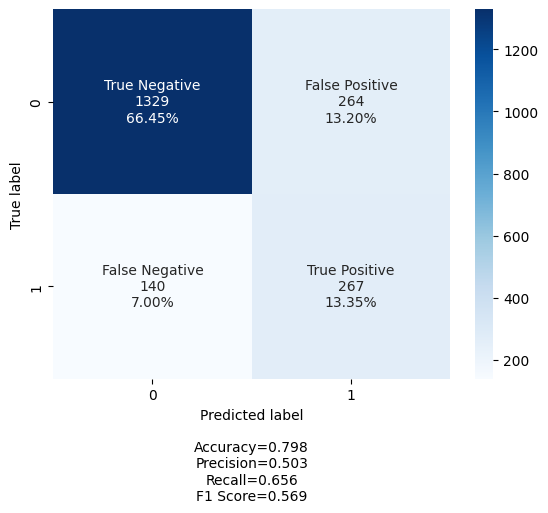

In [ ]:
import seaborn as sn
y_pred1 = model_1.predict(x_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0

cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm2,
                      group_names=labels,
                      cmap='Blues')

#### Conclusion:

- While training SGD model with SMOTE has reduced accuracy in both training and validation data, we have gain a great improvement in **Recall becoming 65%** which might be due to having more balanced data in Training.

- Let's see if we train  **Adam optimizer** model with SMOTE oversampled data

###Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

We'll train the initial network with Adam optimizer, using Balanced data that is done by SMOTE.

- network structureis :
- 1 input, 2 hidden, 1 output layers
- relu and tanh activations for the first and second hidden layer respectively
- he_normal and Xavier as the wight initializers for the first and second layers respectively
- Adam optimizer

In [ ]:
set_global_random_seed()
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(64,activation="relu", input_dim = x_train.shape[1],kernel_initializer='he_normal'))
model_1.add(Dense(32,activation="tanh"))
model_1.add(Dense(1,activation = 'sigmoid'))

In [ ]:
optimizer = keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model_1.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
start = time.time()
history = model_1.fit(x_train_over, y_train_over, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
299/299 [==============================] - 2s 3ms/step - loss: 0.5171 - accuracy: 0.7442 - val_loss: 0.4505 - val_accuracy: 0.7945
Epoch 2/50
299/299 [==============================] - 1s 2ms/step - loss: 0.4328 - accuracy: 0.7968 - val_loss: 0.4185 - val_accuracy: 0.8065
Epoch 3/50
299/299 [==============================] - 1s 2ms/step - loss: 0.4101 - accuracy: 0.8129 - val_loss: 0.4151 - val_accuracy: 0.8060
Epoch 4/50
299/299 [==============================] - 1s 2ms/step - loss: 0.3941 - accuracy: 0.8215 - val_loss: 0.4089 - val_accuracy: 0.8080
Epoch 5/50
299/299 [==============================] - 1s 2ms/step - loss: 0.3816 - accuracy: 0.8279 - val_loss: 0.4525 - val_accuracy: 0.7895
Epoch 6/50
299/299 [==============================] - 1s 2ms/step - loss: 0.3730 - accuracy: 0.8299 - val_loss: 0.4220 - val_accuracy: 0.8050
Epoch 7/50
299/299 [==============================] - 1s 2ms/step - loss: 0.3641 - accuracy: 0.8391 - val_loss: 0.4438 - val_accuracy: 0.7965
Epoch 

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  43.0379638671875


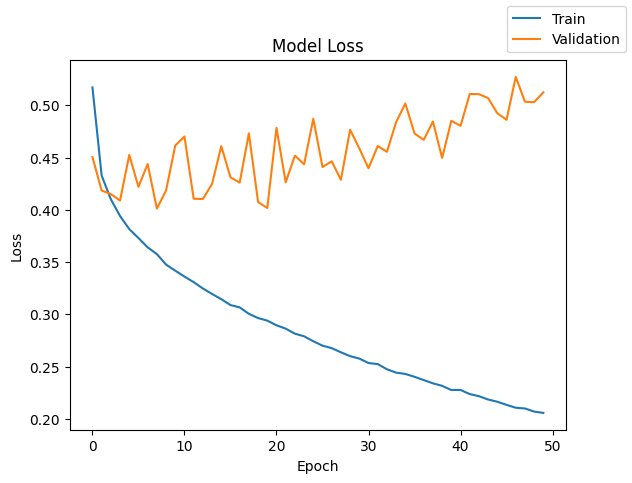

In [ ]:
plot(history,'loss')

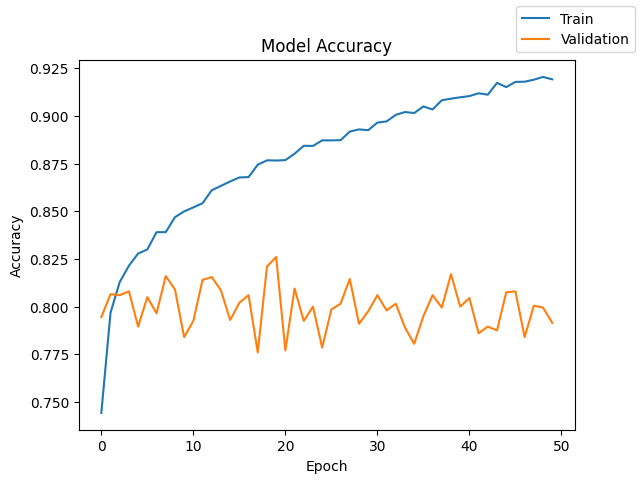

In [ ]:
plot(history,'accuracy')

In [ ]:
results.loc[6] = [2,[64,32],["relu","tanh"],50,32,"SMOTE oversampled Adam",["0.01","-"],["he","xavier"],"-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,2,"[64, 32]","[relu, tanh]",50,32,sgd,"[0.01, -]","[he, xavier]",-,0.328022,0.348066,0.866000,0.8515,26.91
1,2,"[64, 32]","[relu, tanh]",50,32,sgd with momentum,"[0.01, 0.3]","[he, xavier]",-,0.320067,0.347306,0.869000,0.8570,28.32
2,2,"[64, 32]","[relu, tanh]",50,32,Adam,"[0.001, -]","[he, xavier]",-,0.254058,0.380731,0.898000,0.8490,41.80
3,2,"[64, 32]","[relu, tanh]",50,32,Adam,"[0.0001, -]","[he, xavier]",-,0.330129,0.348333,0.867667,0.8540,85.52
4,2,"[64, 32]","[relu, tanh]",50,32,Adam,"[0.0001, -]","[he, xavier]",dropout (0.2),0.354475,0.350907,0.853667,0.8520,28.87
5,2,"[64, 32]","[relu, tanh]",50,32,SMOTE oversampled sgd,"[0.01, 0.3]","[he, xavier]",-,0.347185,0.419821,0.845333,0.8100,41.54
6,2,"[64, 32]","[relu, tanh]",50,32,SMOTE oversampled Adam,"[0.01, -]","[he, xavier]",-,0.205782,0.512399,0.919213,0.7915,43.04


In [ ]:
score = model_1.evaluate(x_test, y_test)
print(score)

63/63 [==============================] - 0s 1ms/step - loss: 0.4947 - accuracy: 0.8030
[0.4946659505367279, 0.8029999732971191]


63/63 [==============================] - 0s 1ms/step


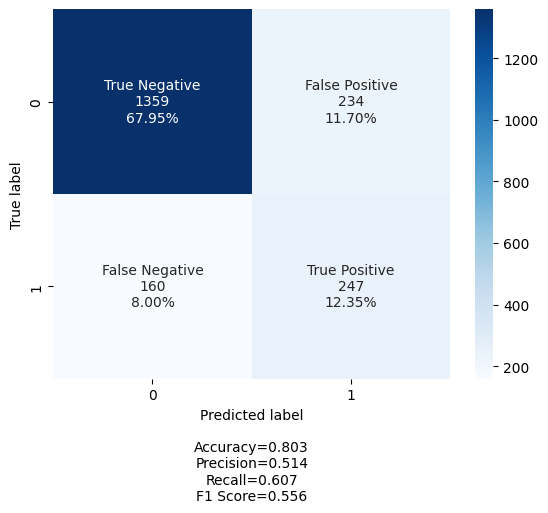

In [ ]:
import seaborn as sn
y_pred1 = model_1.predict(x_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0

cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm2,
                      group_names=labels,
                      cmap='Blues')

#### Conclusion:

- Adam optimized model with trained with SMOTE oversampled data has increased  accuracy training but decrease accuracy in validation data,
- Compare to SGD with SMOTE recall has reduced 5%

- Let's see if we train  **Adam optimizer And Dropout** model with SMOTE oversampled data

###Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

We'll train the initial network with Adam optimizer and Dropouts, using Balanced data that is done by SMOTE.

- network structureis :
- 1 input, 2 hidden, 1 output layers
- relu and tanh activations for the first and second hidden layer respectively - he_normal and Xavier as the wight initializers for the first and second layers respectively
- Adam optimizer
- Dropout

In [ ]:
set_global_random_seed()
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(64,activation="relu", input_dim = x_train.shape[1],kernel_initializer='he_normal'))
model_1.add(Dropout(dropout_rate))
model_1.add(Dense(32,activation="tanh"))
model_1.add(Dense(1,activation = 'sigmoid'))

In [ ]:
optimizer = keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model_1.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
start = time.time()
history = model_1.fit(x_train_over, y_train_over, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
299/299 [==============================] - 2s 3ms/step - loss: 0.5499 - accuracy: 0.7190 - val_loss: 0.4748 - val_accuracy: 0.7760
Epoch 2/50
299/299 [==============================] - 1s 2ms/step - loss: 0.4733 - accuracy: 0.7776 - val_loss: 0.4384 - val_accuracy: 0.8000
Epoch 3/50
299/299 [==============================] - 1s 2ms/step - loss: 0.4508 - accuracy: 0.7862 - val_loss: 0.4383 - val_accuracy: 0.7955
Epoch 4/50
299/299 [==============================] - 1s 2ms/step - loss: 0.4362 - accuracy: 0.7940 - val_loss: 0.4429 - val_accuracy: 0.7935
Epoch 5/50
299/299 [==============================] - 1s 3ms/step - loss: 0.4231 - accuracy: 0.8020 - val_loss: 0.4547 - val_accuracy: 0.7875
Epoch 6/50
299/299 [==============================] - 1s 3ms/step - loss: 0.4173 - accuracy: 0.8067 - val_loss: 0.4342 - val_accuracy: 0.8015
Epoch 7/50
299/299 [==============================] - 1s 3ms/step - loss: 0.4100 - accuracy: 0.8099 - val_loss: 0.4258 - val_accuracy: 0.8050
Epoch 

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  82.7622606754303


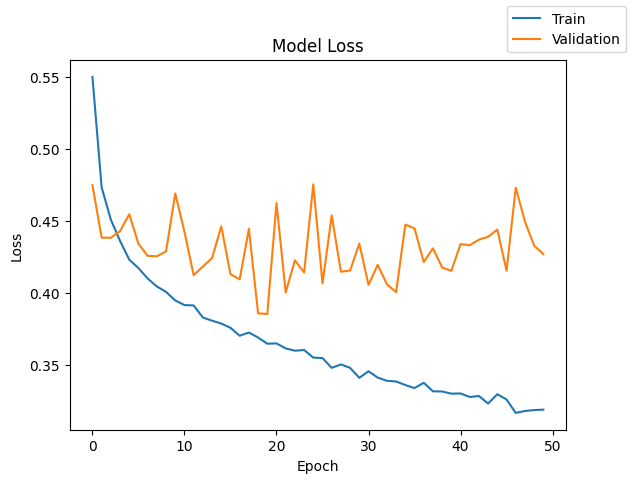

In [ ]:
plot(history,'loss')

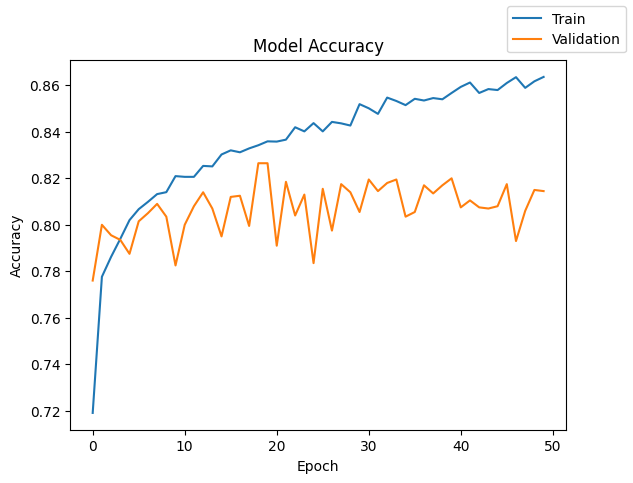

In [ ]:
plot(history,'accuracy')

In [ ]:
results.loc[7] = [2,[64,32],["relu","tanh"],50,32,"SMOTE oversampled Adam",["0.01","-"],["he","xavier"],"dropout(.2)",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,2,"[64, 32]","[relu, tanh]",50,32,sgd,"[0.01, -]","[he, xavier]",-,0.328022,0.348066,0.866000,0.8515,43.26
1,2,"[64, 32]","[relu, tanh]",50,32,sgd with momentum,"[0.01, 0.3]","[he, xavier]",-,0.320067,0.347306,0.869000,0.8570,41.59
2,2,"[64, 32]","[relu, tanh]",50,32,Adam,"[0.001, -]","[he, xavier]",-,0.254058,0.380731,0.898000,0.8490,41.89
3,2,"[64, 32]","[relu, tanh]",50,32,Adam,"[0.0001, -]","[he, xavier]",-,0.330203,0.353156,0.868333,0.8590,38.00
4,2,"[64, 32]","[relu, tanh]",50,32,Adam,"[0.0001, -]","[he, xavier]",dropout (0.2),0.354475,0.350907,0.853667,0.8520,45.42
5,2,"[64, 32]","[relu, tanh]",50,32,SMOTE oversampled sgd,"[0.01, 0.0]","[he, xavier]",-,0.347185,0.419821,0.845333,0.8100,83.03
6,2,"[64, 32]","[relu, tanh]",50,32,Adam oversampled sgd,"[0.01, -]","[he, xavier]",-,0.205782,0.512399,0.919213,0.7915,57.97
7,2,"[64, 32]","[relu, tanh]",50,32,SMOTE oversampled Adam,"[0.01, -]","[he, xavier]",dropout(.2),0.319052,0.426952,0.863646,0.8145,48.33


In [ ]:
score = model_1.evaluate(x_test, y_test)
print(score)

63/63 [==============================] - 0s 1ms/step - loss: 0.4271 - accuracy: 0.8045
[0.42707645893096924, 0.8044999837875366]


63/63 [==============================] - 0s 1ms/step


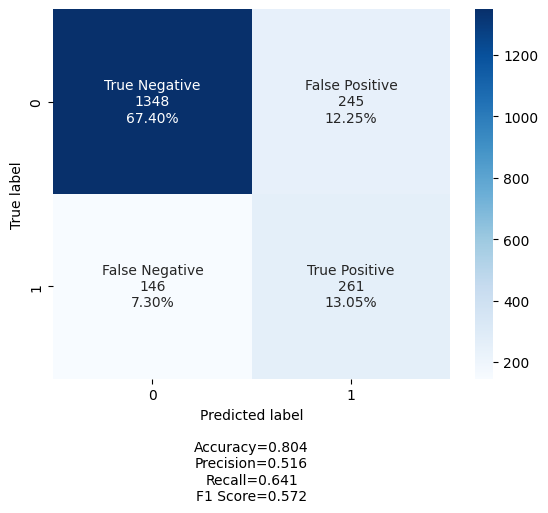

In [ ]:
import seaborn as sn
y_pred1 = model_1.predict(x_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0

cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm2,
                      group_names=labels,
                      cmap='Blues')

#### Conclusion:

- Adam optimized with Dropout model, trained with SMOTE oversampled data, has reduced the traning accuracy by 4% and increased validation accuracy by 2%
- This shows that although the training accuracy has reduced the model is generalized bettre
- Compare to SGD with SMOTE recall is almost the same

- Let's see if we train  **Adam optimizer with less learning rate And Dropout** model with SMOTE oversampled data

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, reduced learning rate and Dropout

We'll train the initial network with Adam optimizer with reduced learning rate and Dropouts, using Balanced data that is done by SMOTE.

- network structureis :
- 1 input, 2 hidden, 1 output layers
- relu and tanh activations for the first and second hidden layer respectively - he_normal and Xavier as the wight initializers for the first and second layers respectively
- Adam optimizer with reduced rearning rate 0.0001
- Dropout

In [ ]:
set_global_random_seed()
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(64,activation="relu", input_dim = x_train.shape[1],kernel_initializer='he_normal'))
model_1.add(Dropout(dropout_rate))
model_1.add(Dense(32,activation="tanh"))
model_1.add(Dense(1,activation = 'sigmoid'))

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=lr)    # defining Adam as the optimizer to be used
model_1.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
start = time.time()
history = model_1.fit(x_train_over, y_train_over, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
299/299 [==============================] - 2s 4ms/step - loss: 0.6960 - accuracy: 0.5696 - val_loss: 0.6076 - val_accuracy: 0.7025
Epoch 2/50
299/299 [==============================] - 1s 3ms/step - loss: 0.5996 - accuracy: 0.6859 - val_loss: 0.5501 - val_accuracy: 0.7515
Epoch 3/50
299/299 [==============================] - 1s 4ms/step - loss: 0.5654 - accuracy: 0.7110 - val_loss: 0.5185 - val_accuracy: 0.7680
Epoch 4/50
299/299 [==============================] - 1s 3ms/step - loss: 0.5448 - accuracy: 0.7290 - val_loss: 0.5105 - val_accuracy: 0.7655
Epoch 5/50
299/299 [==============================] - 1s 2ms/step - loss: 0.5298 - accuracy: 0.7450 - val_loss: 0.5182 - val_accuracy: 0.7545
Epoch 6/50
299/299 [==============================] - 1s 2ms/step - loss: 0.5208 - accuracy: 0.7496 - val_loss: 0.4954 - val_accuracy: 0.7675
Epoch 7/50
299/299 [==============================] - 1s 2ms/step - loss: 0.5129 - accuracy: 0.7506 - val_loss: 0.4891 - val_accuracy: 0.7685
Epoch 

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  42.80625629425049


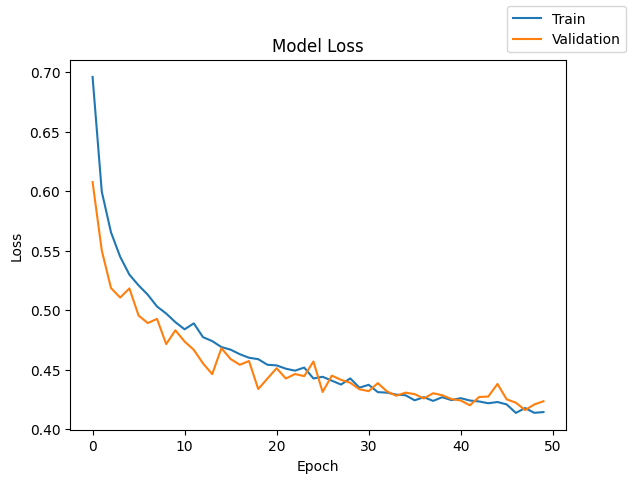

In [ ]:
plot(history,'loss')

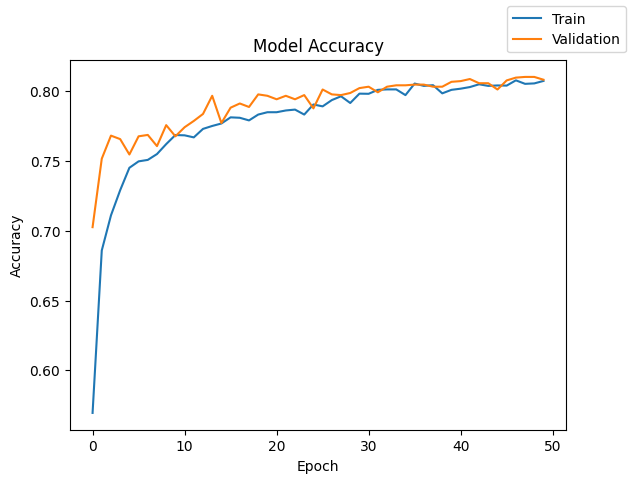

In [ ]:
plot(history,'accuracy')

In [ ]:
results.loc[8] = [2,[64,32],["relu","tanh"],50,32,"SMOTE oversampled Adam",["0.01",lr],["he","xavier"],"dropout(.2)",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,2,"[64, 32]","[relu, tanh]",50,32,sgd,"[0.01, -]","[he, xavier]",-,0.328022,0.348066,0.866000,0.8515,26.91
1,2,"[64, 32]","[relu, tanh]",50,32,sgd with momentum,"[0.01, 0.3]","[he, xavier]",-,0.320067,0.347306,0.869000,0.8570,28.32
2,2,"[64, 32]","[relu, tanh]",50,32,Adam,"[0.001, -]","[he, xavier]",-,0.254058,0.380731,0.898000,0.8490,41.80
3,2,"[64, 32]","[relu, tanh]",50,32,Adam,"[0.0001, -]","[he, xavier]",-,0.330129,0.348333,0.867667,0.8540,85.52
4,2,"[64, 32]","[relu, tanh]",50,32,Adam,"[0.0001, -]","[he, xavier]",dropout (0.2),0.354475,0.350907,0.853667,0.8520,28.87
5,2,"[64, 32]","[relu, tanh]",50,32,SMOTE oversampled sgd,"[0.01, 0.3]","[he, xavier]",-,0.347185,0.419821,0.845333,0.8100,41.54
6,2,"[64, 32]","[relu, tanh]",50,32,SMOTE oversampled Adam,"[0.01, -]","[he, xavier]",-,0.205782,0.512399,0.919213,0.7915,43.04
7,2,"[64, 32]","[relu, tanh]",50,32,SMOTE oversampled Adam,"[0.01, -]","[he, xavier]",dropout(.2),0.319052,0.426952,0.863646,0.8145,82.76
8,2,"[64, 32]","[relu, tanh]",50,32,SMOTE oversampled Adam,"[0.01, 0.0001]","[he, xavier]",dropout(.2),0.414243,0.423351,0.807137,0.8080,66.96


In [ ]:
score = model_1.evaluate(x_test, y_test)
print(score)

63/63 [==============================] - 0s 2ms/step - loss: 0.4359 - accuracy: 0.7975
[0.4359244108200073, 0.7975000143051147]


63/63 [==============================] - 0s 2ms/step


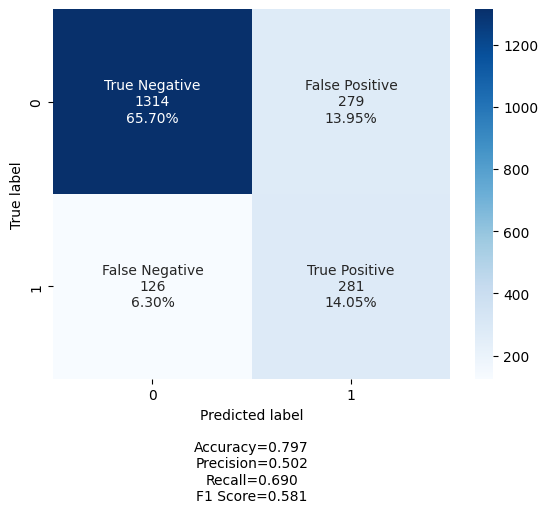

In [ ]:
import seaborn as sn
y_pred1 = model_1.predict(x_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0

cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm2,
                      group_names=labels,
                      cmap='Blues')

#### Conclusion:

- Adam optimized with reduced learning rate and Dropout model, trained with SMOTE oversampled data:

- has made the both traning and validation accuracy to 80%
- the model is giving ~80% accuracy on test data as well.
- this is a good sign of genaeralizing

- This shows that although the accuracy has reduced a bit, the model is generalized well

- The **Recall is 69%** which is the best recall we get so far


## Model Performance Comparison and Final Model Selection

- **Initila Model improvement results:**
- Best 44-45% recall we get so far is with SGD with Momentum 0.3
. the recall was 44-45%
- Best model so far which can genaralize and have good recall is Adam with reduced learning rate to 1e-4

- **SMOTE oversampling trained model performance:**

- Base model with SGD and SMOTE oversampled training data has **increased Recall to ~66%**
- Base model with Adam and SMOTE oversampled training data has increased training accurace but shows the sign of overfitting. Accuracy is 91% and 79% for  Training and Validation data and recal gets less to 60%

- Base model with Adam and Dropout and SMOTE oversampled training data has reduced accurace but shows better generalization.

- Base model with Adam with reduced learning rate to 0.0001 and Dropout and SMOTE oversampled training data has given the **best Recall 69%**

#### **Final Model Selection:**

- **The best model is Base model with Adam with reduced learning rate to 0.0001 and Dropout of 0.2 which is trained with SMOTE oversampled training data**  

-


## Actionable Insights and Business Recommendations

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,2,"[64, 32]","[relu, tanh]",50,32,sgd,"[0.01, -]","[he, xavier]",-,0.328022,0.348066,0.866000,0.8515,26.91
1,2,"[64, 32]","[relu, tanh]",50,32,sgd with momentum,"[0.01, 0.3]","[he, xavier]",-,0.320067,0.347306,0.869000,0.8570,28.32
2,2,"[64, 32]","[relu, tanh]",50,32,Adam,"[0.001, -]","[he, xavier]",-,0.254058,0.380731,0.898000,0.8490,41.80
3,2,"[64, 32]","[relu, tanh]",50,32,Adam,"[0.0001, -]","[he, xavier]",-,0.330129,0.348333,0.867667,0.8540,85.52
4,2,"[64, 32]","[relu, tanh]",50,32,Adam,"[0.0001, -]","[he, xavier]",dropout (0.2),0.354475,0.350907,0.853667,0.8520,28.87
5,2,"[64, 32]","[relu, tanh]",50,32,SMOTE oversampled sgd,"[0.01, 0.3]","[he, xavier]",-,0.347185,0.419821,0.845333,0.8100,41.54
6,2,"[64, 32]","[relu, tanh]",50,32,SMOTE oversampled Adam,"[0.01, -]","[he, xavier]",-,0.205782,0.512399,0.919213,0.7915,43.04
7,2,"[64, 32]","[relu, tanh]",50,32,SMOTE oversampled Adam,"[0.01, -]","[he, xavier]",dropout(.2),0.319052,0.426952,0.863646,0.8145,82.76
8,2,"[64, 32]","[relu, tanh]",50,32,SMOTE oversampled Adam,"[0.01, 0.0001]","[he, xavier]",dropout(.2),0.414243,0.423351,0.807137,0.8080,66.96


1. **Baseline Model Performance:**
    - A baseline model with two hidden layers having ReLU and tanh activations, using stochastic gradient descent with a batch size of 32, and run for 50 epochs, yielded good overall results (86% train accuracy and 85% validation accuracy).
    - However Recall for the model was 46%
    - We observed initial rapid improvement in loss and accuracy, followed by divergence between the training and validation sets after the initial few epochs.

2. **Effect of Momentum in SGD**:
    - Introduction of small momentum of 0.3 to SGD leads to a quicker decrease in loss.
    - Model accuracy improved a bit and Recall did not change. they stayed around ~86% and 46% for accuracy and recall respectively.

3. **Adam vs SGD with Momentum**:
    - The use of Adam helps increasing training accuracy, Adam shows improved convergence.
    - Further reduction of the learning rate for Adam (1e-4) leads to smoother convergence but slower model training. It also keeps the accuracy almost the 86% but no improvement in Recall

4. **Effect of Regularization**:
    - Dropout with lower ratios (20%) shows no major improvement.
    - Adding Dropout to models with oversampled trained data showed better generalization and less overfitting

5. **Effect of Training with Oversample training data SMOTE**:
    - Using SMOTE to oversample training data has am effect of increasing recall to ~66%. However with SGD oversampled training model we got reduce in accuracy.
    - With Adam models we see a sign of overfitting which was resolved by adding Dropout and introducing less learning rate

5. **Best Model**:
    - Base model with Adam with reduced learning rate to 0.0001 and Dropout of 0.2 which is trained with SMOTE oversampled training data

In [ ]:
#This code is to use roc_curve to find out the best treshold fo sigmoid function as opposed to default .5 threshold
# This code is copied from the instructor notebook and is not mean to work here, unless its getting some changes
# predict probabilities
yhat = model_3.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()